# ISP: Child care and early learning in Canada - Survey Analysis 2023

## Step 1: Data Cleaning and preparation

In [154]:
# Creating dictionaries to transform column names and values into human-readable words
rename_dict = {
    'PUMFID': 'ID',
    'WTPP': 'Weight',
    'NCHILD_R': 'Num_Children',
    'SPFLAGR': 'Spouse_Flag',
    'AGE_PMKR': 'Age_Respondent_Grouped',
    'AGE_SPR': 'Age_Spouse_Grouped',
    'CH_AGE': 'Child_Age_Grouped',
    'PROV': 'Province',
    'ARR_05': 'Attended_Child_Care_Three_Months',
    'ARR_10AR': 'Arrangement_Daycare_Three_Months',
    'ARR_10BR': 'Arrangement_Relative_Care_Three_Months',
    'ARR_10DR': 'Arrangement_Family_Care_Three_Months',
    'ARR_10ER': 'Arrangement_Before_After_School_Three_Months',
    'ARR_10FR': 'Arrangement_Other_Care_Three_Months',
    'NUMCARER': 'Num_Care_Arrangements',
    'ARRT10AR': 'Hours_Per_Week_Daycare',
    'ARRT10BR': 'Hours_Per_Week_Relative_Care',
    'ARRT10DR': 'Hours_Per_Week_Family_Care',
    'ARRT10ER': 'Hours_Per_Week_Before_After_School',
    'ARRT10FR': 'Hours_Per_Week_Other_Care',
    'RMAINARR': 'Main_Care_Arrangement',
    'ARR_30': 'Main_Arrangement_Licensed_Accredited',
    'ARR_40A': 'Language_Main_Arrangement_English',
    'ARR_40B': 'Language_Main_Arrangement_French',
    'ARR_40C': 'Language_Main_Arrangement_Other',
    'SUBSFL_R': 'Subsidy_Flag',
    'COSTG_A': 'Annual_Cost_Daycare',
    'COSTG_B': 'Annual_Cost_Relative_Care',
    'COSTG_D': 'Annual_Cost_Family_Care',
    'COSTG_E': 'Annual_Cost_Before_After_School',
    'COSTG_F': 'Annual_Cost_Other_Care',
    'ALLCOSTG': 'Annual_Cost_Care_Total',
    'ARR110AR': 'Days_Daycare_Typical_Week',
    'ARR110BR': 'Days_Relative_Care_Typical_Week',
    'ARR110DR': 'Days_Family_Care_Typical_Week',
    'ARR110ER': 'Days_Before_After_School_Typical_Week',
    'ARR110FR': 'Days_Other_Care_Typical_Week',
    'ARR120AR': 'Evening_Weekend_Daycare',
    'ARR120BR': 'Evening_Weekend_Relative_Care',
    'ARR120DR': 'Evening_Weekend_Family_Care',
    'ARR120ER': 'Evening_Weekend_Before_After_School',
    'ARR120FR': 'Evening_Weekend_Other_Care',
    'ARR150AR': 'Care_Type_Choice_Location',
    'ARR150BR': 'Care_Type_Choice_Cost',
    'ARR150CR': 'Care_Type_Choice_Hours',
    'ARR150DR': 'Care_Type_Choice_Qualifications',
    'ARR150ER': 'Care_Type_Choice_Trustworthiness',
    'ARR150FR': 'Care_Type_Choice_Licensed',
    'ARR150GR': 'Care_Type_Choice_Program_Characteristics',
    'ARR150IR': 'Care_Type_Choice_Cultural_Relevance',
    'ARR150JR': 'Care_Type_Choice_Sibling_Attendance',
    'ARR150KR': 'Care_Type_Choice_Only_Option',
    'ARR150LR': 'Care_Type_Choice_Other',
    'MREASONR': 'Main_Care_Reason',
    'ARR_160': 'Difficulty_Finding_Care_Arrangement',
    'ARR160AR': 'Difficulty_Affordable_Care',
    'ARR160BR': 'Difficulty_Subsidized_Care',
    'ARR160CR': 'Difficulty_Licensed_Care',
    'ARR160DR': 'Difficulty_Local_Care',
    'ARR160ER': 'Difficulty_Qualified_Care',
    'ARR160FR': 'Difficulty_Quality_Care',
    'ARR160HR': 'Difficulty_Schedule_Fit',
    'ARR160IR': 'Difficulty_Cultural_Care',
    'ARR160JR': 'Difficulty_Multiple_Children',
    'ARR160KR': 'Difficulty_Other',
    'M_DIFFR': 'Main_Difficulty_Finding_Care',
    'ARR_170A': 'Impact_Difficulties_Postponed_Work',
    'ARR_170B': 'Impact_Difficulties_Work_From_Home',
    'ARR_170C': 'Impact_Difficulties_Work_Fewer_Hours',
    'ARR_170D': 'Impact_Difficulties_Changed_Schedule',
    'ARR_170F': 'Impact_Difficulties_Stay_Home_Parent',
    'ARR_170G': 'Impact_Difficulties_Discontinued_Schooling_Training',
    'ARR_170H': 'Impact_Difficulties_Multiple_Temporary_Arrangements',
    'ARR_170I': 'Impact_Difficulties_Higher_Cost',
    'ARR170JR': 'Impact_Difficulties_Other',
    'ARR_170K': 'Impact_Difficulties_None',
    'ARR190AR': 'Reason_Not_Using_Care_Unemployed',
    'ARR190DR': 'Reason_Not_Using_Care_Prefer_Adjusted_Schedule',
    'ARR190ER': 'Reason_Not_Using_Care_Prefer_Care_While_Working',
    'ARR190FR': 'Reason_Not_Using_Care_Shortage',
    'ARR190GR': 'Reason_Not_Using_Care_Cost',
    'ARR190IR': 'Reason_Not_Using_Care_Unsuitable',
    'ARR190JR': 'Reason_Not_Using_Care_School',
    'ARR190KR': 'Reason_Not_Using_Care_Other',
    'ARR190LR': 'Reason_Not_Using_Care_None',
    'MNOCARER': 'Main_Reason_Not_Using_Care',
    'ARR_220': 'Ever_Used_Care',
    'ARR_235': 'Waitlist_Care',
    'ARR_240R': 'School_Attendance',
    'LM_PMKR': 'Employed_Status_Respondent',
    'LM_SPR': 'Employed_Status_Spouse',
    'IND2_PR': 'Industry_Respondent',
    'IND2_SR': 'Industry_Spouse',
    'OCC1_PR': 'Occupation_Respondent',
    'OCC1_SR': 'Occupation_Spouse',
    'LMA601PR': 'Part_Time_Full_Time_Work_Respondent',
    'LMA601SR': 'Part_Time_Full_Time_Work_Spouse',
    'MA_PMKR': 'Main_Activity_Respondent',
    'MA_SPR': 'Main_Activity_Spouse',
    'CHG_01': 'Would_Change_Care_Arrangements',
    'CHG_02': 'Would_Use_Care',
    'CHG_03AR': 'Preferred_Time_Weekday_Hours',
    'CHG_03BR': 'Preferred_Time_Early_Morning',
    'CHG_03CR': 'Preferred_Time_Early_Evening',
    'CHG_03DR': 'Preferred_Time_Late_Evening',
    'CHG_03ER': 'Preferred_Time_Overnight',
    'CHG_03FR': 'Preferred_Time_Weekend',
    'CHG_03GR': 'Preferred_Time_Seasonal',
    'CHG_03HR': 'Preferred_Time_On_Demand',
    'CHG_03IR': 'Preferred_Time_Rotating_Schedule',
    'CHG_04R': 'Preferred_Num_Hours_Per_Week_Child_Care',
    'CHG_05R': 'Most_Important_Criteria_Decision_Child_Care_Arrangement',
    'CHG_06R': 'Preferred_Type_Main_Child_Care_Arrangement',
    'CHG_07A': 'Would_Change_Main_Activity_Start_Working',
    'CHG_07B': 'Would_Change_Main_Activity_Job_Change_Quitting',
    'CHG_07C': 'Would_Change_Main_Activity_Work_Schedules',
    'CHG_07D': 'Would_Change_Main_Activity_Work_More_Hours',
    'CHG_07E': 'Would_Change_Main_Activity_Work_Less_Hours',
    'CHG_07F': 'Would_Change_Main_Activity_More_Responsibility_Work',
    'CHG_07G': 'Would_Change_Main_Activity_Less_Responsibility_Work',
    'CHG_07H': 'Would_Change_Main_Activity_Work_Outside_Home',
    'CHG_07I': 'Would_Change_Main_Activity_Work_From_Home',
    'CHG_07J': 'Would_Change_Main_Activity_School_Training',
    'CHG_07K': 'Would_Change_Main_Activity_Other',
    'CHG_07L': 'Would_Change_Main_Activity_None',
    'UWS05_PR': 'Work_Schedule_Varies_Respondent',
    'UWS05_SR': 'Work_Schedule_Varies_Spouse',
    'UWS10_PR': 'Work_Schedule_Weekends_Respondent',
    'UWS10_SR': 'Work_Schedule_Weekends_Spouse',
    'UWS15_PR': 'Work_Schedule_Known_In_Advance_Respondent',
    'UWS15_SR': 'Work_Schedule_Known_In_Advance_Spouse',
    'UWS20_PR': 'Work_Schedule_Type_Respondent',
    'UWS20_SR': 'Work_Schedule_Type_Spouse',
    'EWB01APR': 'Work_Benefit_Pension_Respondent',
    'EWB01ASR': 'Work_Benefit_Pension_Spouse',
    'EWB01BPR': 'Work_Benefit_Paid_Sick_Leave_Respondent',
    'EWB01BSR': 'Work_Benefit_Paid_Sick_Leave_Spouse',
    'EWB01CPR': 'Work_Benefit_Paid_Vacation_Respondent',
    'EWB01CSR': 'Work_Benefit_Paid_Vacation_Spouse',
    'EWB01DPR': 'Work_Benefit_Other_Leave_Respondent',
    'EWB01DSR': 'Work_Benefit_Other_Leave_Spouse',
    'EWB01EPR': 'Work_Benefit_Disability_Respondent',
    'EWB01ESR': 'Work_Benefit_Disability_Spouse',
    'EWB01FPR': 'Work_Benefit_Supplemental_Medical_Dental_Care_Respondent',
    'EWB01FSR': 'Work_Benefit_Supplemental_Medical_Dental_Care_Spouse',
    'EWB01GPR': 'Work_Benefit_Worker_Compensation_Respondent',
    'EWB01GSR': 'Work_Benefit_Worker_Compensation_Spouse',
    'EWB01HPR': 'Work_Benefit_Supplemental_Mat_Par_Benefits_Respondent',
    'EWB01HSR': 'Work_Benefit_Supplemental_Mat_Par_Benefits_Spouse',
    'EWB01IPR': 'Work_Benefit_Flexible_Work_Schedule_Respondent',
    'EWB01ISR': 'Work_Benefit_Flexible_Work_Schedule_Spouse',
    'EWB01JPR': 'Work_Benefit_Option_Work_From_Home_Respondent',
    'EWB01JSR': 'Work_Benefit_Option_Work_From_Home_Spouse',
    'EWB01KPR': 'Work_Benefit_Other_Respondent',
    'EWB01KSR': 'Work_Benefit_Other_Spouse',
    'EWB01LPR': 'Work_Benefit_None_Respondent',
    'EWB01LSR': 'Work_Benefit_None_Spouse',
    'HHINCR': 'Total_Household_Income_Grouped',
    'VISMINHH': 'Visible_Minority_Household',
    'ED_PMKR': 'Highest_Education_Respondent',
    'ED_SPR': 'Highest_Education_Spouse',
    'PBP_HH': 'Born_In_Canada_Household',
    'IM_HH': 'Immigration_Canada_Five_Years_Household',
    'IID_HH': 'Indigenous_Group_Household',
    'WLB_01R': 'Difficulty_Family_Responsibilities_Due_To_Work',
    'WLB_02R': 'Difficulty_Work_Responsibilities_Due_To_Family',
    'WLB_03R': 'Satisfaction_Balance_Job_Home_Life'
}

In [156]:
# use dask to read csv
import dask.dataframe as dd

# load dataset
file_path = 'data/survey_2023.csv'
df = dd.read_csv(file_path)

# sample a fraction of the dataset (e.g., 80%)
df_sampled = df.sample(frac=0.8)

# convert to Pandas DataFrame for inspection
df_sampled_pandas = df_sampled.compute()

print(df_sampled_pandas.head())

       PUMFID      WTPP  NCHILD_R  SPFLAGR  AGE_PMKR  AGE_SPR  CH_AGE  PROV  \
25092  107240  163.5759         1        2         2        3       1    35   
19129   81732  161.9899         1        2         3        3       3    35   
9542    42414   47.6386         3        2         3        3       1    59   
27759  118321   63.5096         2        2         2        2       1    48   
23841  101913  107.6351         3        2         3        3       1    59   

       ARR_05  ARR_10AR  ...  WLB_01R  WLB_02R  WLB_03R  IID_HH  VISMINHH  \
25092       1         2  ...        6        6        6       2         2   
19129       2         6  ...        6        6        6       2         1   
9542        1         2  ...        3        4        3       2         2   
27759       2         6  ...        6        6        6       2         1   
23841       1         9  ...        2        3        2       2         1   

       PBP_HH  IM_HH  ED_PMKR  ED_SPR  HHINCR  
25092       2 

In [158]:
# rename columns

print("Columns before renaming:")
print(df_sampled_pandas.columns)

# rename columns with dictionary
df_sampled_renamed = df_sampled.rename(columns=rename_dict)

# convert to Pandas DataFrame for inspection
df_sampled_pandas = df_sampled_renamed.compute()

# display first few rows to verify renaming
print(df_sampled_pandas.head())
print(df_sampled_pandas.columns)

Columns before renaming:
Index(['PUMFID', 'WTPP', 'NCHILD_R', 'SPFLAGR', 'AGE_PMKR', 'AGE_SPR',
       'CH_AGE', 'PROV', 'ARR_05', 'ARR_10AR',
       ...
       'WLB_01R', 'WLB_02R', 'WLB_03R', 'IID_HH', 'VISMINHH', 'PBP_HH',
       'IM_HH', 'ED_PMKR', 'ED_SPR', 'HHINCR'],
      dtype='object', length=167)
           ID    Weight  Num_Children  Spouse_Flag  Age_Respondent_Grouped  \
25092  107240  163.5759             1            2                       2   
19129   81732  161.9899             1            2                       3   
9542    42414   47.6386             3            2                       3   
27759  118321   63.5096             2            2                       2   
23841  101913  107.6351             3            2                       3   

       Age_Spouse_Grouped  Child_Age_Grouped  Province  \
25092                   3                  1        35   
19129                   3                  3        35   
9542                    3                  1     

In [160]:
# mapping age values
age_pmkr_dict = {
    1: '15 to 24 years old',
    2: '25 to 34 years old',
    3: '35 to 44 years old',
    4: '45 years or older',
    9: 'Not stated'
}

# valid skip seems to be common when another column that this one is depending on would make it not have a value (i.e. if the spouse doesn't live in household, education would be a valid skip or if they didn't attend childcare, arrangements wouldn't have a value)

age_spr_dict = {
    2: '25 to 34 years old',
    3: '35 to 44 years old',
    4: '45 years or older',
    6: 'Valid skip',
    9: 'Not stated'
}

child_age_dict = {
    1: '0-1 years old',
    2: '2-3 years old',
    3: '4-5 years old'
}

print(df_sampled_renamed.columns)

df_sampled_pandas['Age_Respondent_Grouped'] = df_sampled_pandas['Age_Respondent_Grouped'].map(age_pmkr_dict)
df_sampled_pandas['Age_Spouse_Grouped'] = df_sampled_pandas['Age_Spouse_Grouped'].map(age_spr_dict)
df_sampled_pandas['Child_Age_Grouped'] = df_sampled_pandas['Child_Age_Grouped'].map(child_age_dict)

# Replace "Not stated" and "Valid skip" with NaN
# df_sampled_pandas['AGE_PMKR'].replace({'Not stated': None}, inplace=True)
# df_sampled_pandas['AGE_SPR'].replace({'Not stated': None, 'Valid skip': None}, inplace=True)

# Ensure the columns are of type string for categorical data
# df_sampled_renamed['Age_Respondent_Grouped'] = df_sampled_pandas['Age_Respondent_Grouped'].astype('category')
# df_sampled_renamed['Age_Spouse_Grouped'] = df_sampled_pandas['Age_Spouse_Grouped'].astype('category')


# convert to Pandas DataFrame for inspection
# df_sampled_pandas = df_sampled_renamed.compute()

# display first few rows to verify renaming
# print(df_sampled_pandas.head())

print(df_sampled_pandas.head())

Index(['ID', 'Weight', 'Num_Children', 'Spouse_Flag', 'Age_Respondent_Grouped',
       'Age_Spouse_Grouped', 'Child_Age_Grouped', 'Province',
       'Attended_Child_Care_Three_Months', 'Arrangement_Daycare_Three_Months',
       ...
       'Difficulty_Family_Responsibilities_Due_To_Work',
       'Difficulty_Work_Responsibilities_Due_To_Family',
       'Satisfaction_Balance_Job_Home_Life', 'Indigenous_Group_Household',
       'Visible_Minority_Household', 'Born_In_Canada_Household',
       'Immigration_Canada_Five_Years_Household',
       'Highest_Education_Respondent', 'Highest_Education_Spouse',
       'Total_Household_Income_Grouped'],
      dtype='object', length=167)
           ID    Weight  Num_Children  Spouse_Flag Age_Respondent_Grouped  \
25092  107240  163.5759             1            2     25 to 34 years old   
19129   81732  161.9899             1            2     35 to 44 years old   
9542    42414   47.6386             3            2     35 to 44 years old   
27759  118321

In [162]:
# Child care costs
cost_dict = {
    1: '$0 per year',
    2: '$1 to $2,999 per year',
    3: '$3,000 to $7,999 per year',
    4: '$8,000 or more per year',
    6: 'Valid skip',
    9: 'Not stated'
}

# total household income
total_income_dict = {
    1: 'Under $20,000',
    2: '$20,000 to $39,999',
    3: '$40,000 to $59,999',
    4: '$60,000 to $79,999',
    5: '$80,000 to $99,999',
    6: '$100,000 to $149,999',
    7: '$150,000 and over',
    99: 'Not stated'
}

# Province mapping
province_dict = {
    10: 'Newfoundland and Labrador',
    11: 'Prince Edward Island',
    12: 'Nova Scotia',
    13: 'New Brunswick',
    24: 'Quebec',
    35: 'Ontario',
    46: 'Manitoba',
    47: 'Saskatchewan',
    48: 'Alberta',
    59: 'British Columbia',
    60: 'Yukon',
    61: 'Northwest Territories',
    62: 'Nunavut'
}

# mapping num children
num_children_dict = {
    1: 'One child',
    2: 'Two children',
    3: 'Three or more children',
    9: 'Not stated'
}

# mapping spouse flag
spouse_flag_dict = {
    1: "Respondent did not report a spouse in household",
    2: "Respondent's spouse lives in household"
}

# mapping minorities in household
minority_household_dict = {
    1: 'At least one in household',
    2: 'None in household',
    9: 'Not stated'
}

born_in_canada_dict = {
    1: 'At least one in household born outside of Canada',
    2: 'All in household born in Canada',
    9: 'Not stated'
}

# mapping attended child care
attended_child_care_dict = {
    1: 'Yes',
    2: 'No'
}

# mapping arrangements
arrangement_dict = {
    1: 'Yes',
    2: 'No',
    6: 'Valid skip',
    9: 'Not stated'
}

num_arrangement_dict = {
    1: 'One care arrangements',
    2: 'Two or more care arrangements',
    3: 'None',
    6: 'Valid skip',
    9: 'Not stated'
}

# main arrangement mapping
main_arrangement_dict = {
    1: 'Daycare centre, preschool, or CPE',
    2: 'Child care by a relative other than parent/guardian',
    3: 'Family child care home',
    4: 'Before or after school program',
    5: 'Other child care arrangement',
    6: 'Valid skip',
    9: 'Not stated'
}

main_arrangement_licensed_dict = {
    1: "Yes",
    2: "No",
    3: "Don't know",
    6: "Valid skip",
    9: "Not stated"
}

main_arrangement_reason_dict = {
    1: "Location",
    2: "Affordable",
    3: "Hours of operation",
    4: "Qualifications child care provider",
    5: "Care provider trustworthy and nurturing",
    6: "Licensed or accredited child care",
    7: "Program characteristics",
    8: "Offers culturally-relevant or minority language programming",
    9: "Respondent's other children go there or have gone",
    10: "Only option available",
    11: "Other reason",
    12: "No specific reason",
    96: "Valid skip",
    99: "Not stated"
}

# most important criteria decision arrangement
most_important_criteria_decision_arrangement_dict = {
    1: "Location",
    2: "Affordable cost",
    3: "Hours of operation",
    4: "Qualifications child care provider",
    5: "Care provider trustworthy and nurturing",
    6: "Licensed or accredited child care",
    7: "Program characteristics",
    8: "Offers culturally-relevant or minority language programming",
    9: "Could accomodate more than one child in family",
    11: "Other criteria",
    96: "Valid skip",
    99: "Not stated"
}

# preferred type main arrangement mapping
preferred_type_main_arrangement_dict = {
    1: "Daycare centre, preschool or CPE",
    2: "Child care by a relative other than parent/guardian",
    3: "Family child care home",
    4: "Before or after school program",
    5: "Other child care arrangement",
    6: "Valid skip",
    7: "Don't know",
    9: "Not stated"
}

hours_child_care_dict = {
    1: "Less than 5 hours per week",
    2: "5 to less than 15 hours per week",
    3: "15 to less than 30 hours per week",
    4: "30 hours per week or more",
    6: "Valid skip",
    9: "Not stated"
}

# days attended child care mapping
days_attended_care_dict = {
    1: "1 day",
    2: "2 days",
    3: "3 days",
    4: "4 days",
    5: "5 or more days",
    6: "Valid skip",
    9: "Not stated"
}

# evenings/weekend child care attendance mapping
evenings_weekends_attendance_care_dict = {
    1: "Evenings and/or weekend",
    2: "Neither evenings or weekends",
    6: "Valid skip",
    9: "Not stated"
}

# difficulty finding care mappings
difficulty_finding_care_dict = {
    1: 'Yes',
    2: 'No',
    3: 'Did not look',
    9: 'Not stated'
}

main_difficulty_finding_care_dict = {
    1: 'Affordable care',
    2: 'Subsidized care',
    3: 'Licensed or accredited care',
    4: 'Child care available in community',
    5: 'Qualified child care provider',
    6: 'Quality of child care required',
    7: 'Child care fitting in with work or study schedules',
    8: 'Offers culturally-relevant or minority language programming',
    9: 'Could accomodate more than one child in family',
    10: 'Other difficulty',
    96: 'Valid skip',
    99: 'Not stated'
}

# main reason not using care mapping
main_reason_not_using_dict = {
    1: "Unemployed, parental leave, stay at home parent",
    2: "Prefer to adjust work or study schedules",
    3: "Prefer to care for the child while working",
    4: "Shortage of places or waiting list",
    5: "The cost of child care is too high",
    6: "Available child care arrangements are not suitable",
    7: "Child is in school",
    9: "Other reason",
    10: "No specific reason",
    96: "Valid skip",
    99: "Not stated"
}

# waitlist mapping
waitlist_dict = {
    1: "Yes",
    2: "No",
    3: "Don't know",
    9: "Not stated"
}

# would change care mapping
would_change_care_dict = {
    1: "Yes",
    2: "No",
    6: "Valid skip",
    7: "Don't know",
    9: "Not stated"
}

# difficulty responsibilities
difficulty_responsibility_dict = {
    1: 'Always',
    2: 'Often',
    3: 'Sometimes',
    4: 'Rarely',
    5: 'Never',
    6: 'Valid skip',
    9: 'Not stated'
}

satisfaction_job_life_dict = {
    1: 'Very satisfied',
    2: 'Satisfied',
    3: 'Neither satisﬁed nor dissatisﬁed',
    4: 'Dissatisfied',
    5: 'Very dissatisfied',
    6: 'Valid skip',
    9: 'Not stated'
}

# highest education respondent/spouse
education_pmkr_dict = {
    1: "High school diploma or less",
    2: "Postsecondary certiﬁcate or diploma below bachelor level",
    3: "Bachelor's degree or higher",
    9: "Not stated"
}

education_spr_dict = {
    1: "High school diploma or less",
    2: "Postsecondary certiﬁcate or diploma below bachelor level",
    3: "Bachelor's degree or higher",
    6: "Valid skip",
    9: "Not stated"
}

# employement mapping
employment_status_respondent_dict = {
    1: "Employed",
    2: "Not employed",
    9: "Not stated"
}

employment_status_spouse_dict = {
    1: "Employed",
    2: "Not employed",
    6: "Valid skip",
    9: "Not stated"
}

part_time_full_time_dict = {
    1: "Part-time (Less than 30 hrs per week)",
    2: "Full-time (30 hrs or more per week)",
    6: "Valid skip",
    9: "Not stated"
}

main_activity_respondent_dict = {
    1: "Working at a paid job or business",
    2: "Maternity, paternity or parental leave",
    3: "Stay at home parent",
    4: "Other activity",
    9: "Not stated"
}

main_activity_spouse_dict = {
    1: "Working at a paid job or business",
    2: "Maternity, paternity or parental leave",
    3: "Stay at home parent",
    4: "Other activity",
    6: "Valid skip",
    9: "Not stated"
}

# would change main activity mapping
would_change_main_activity_dict = {
    1: 'Yes',
    2: 'No',
    9: 'Not stated'
}

# work schedule known in advance mapping
work_schedule_known_in_advance_dict = {
    1: "Schedule is the same from month-to-month",
    2: "0 to 6 days in advance",
    3: "1 week in advance",
    4: "2 weeks in advance",
    5: "3 weeks in advance",
    6: "1 month or longer in advance",
    7: "Schedule is flexible",
    96: "Valid skip",
    99: "Not stated"
}

work_schedule_type_dict = {
    1: "A regular daytime schedule or shift",
    2: "A regular evening shift",
    3: "A regular night shift",
    4: "A rotating shift",
    5: "A split shift",
    6: "On call only",
    7: "On call in addition to scheduled hours",
    8: "An irregular schedule",
    9: "Other",
    96: "Valid skip",
    99: "Not stated"
}

# industry & ocuppation mappings as per the National Occupational Classification 2021 (NOC) and the North American Industry Classification System 2022 (NAICS)
occupation_dict = {
    1: "Legislative and senior management occupations",
    2: "Business, finance and administration occupations",
    3: "Natural and applied sciences and related occupations",
    4: "Health occupations",
    5: "Occupations in education, law and social, community and government services",
    6: "Occupations in art, culture, recreation and sport",
    7: "Sales and service occupations",
    8: "Trades, transport and equipment operators and related occupations",
    9: "Natural resources, agriculture and related production occupations",
    10: "Occupations in manufacturing and utilities",
    96: "Valid skip",
    99: "Not stated"
}

industry_dict = {
    1: "Agriculture, forestry, fishing and hunting",
    2: "Mining, quarrying, and oil and gas extraction",
    3: "Utilities",
    4: "Construction",
    5: "Manufacturing",
    6: "Wholesale trade",
    7: "Retail trade",
    8: "Transportation and warehousing",
    9: "Information and cultural industries",
    10: "Finance and insurance",
    11: "Real estate and rental and leasing",
    12: "Professional, scientific and technical services",
    13: "Management of companies and enterprises",
    14: "Administrative and support, waste management and remediation services",
    15: "Educational services",
    16: "Health care and social assistance",
    17: "Arts, entertainment and recreation",
    18: "Accommodation and food services",
    19: "Other services (except public administration)",
    20: "Public administration",
    96: "Valid skip",
    99: "Not stated"
}


# cost transformation
df_sampled_pandas['Annual_Cost_Daycare'] = df_sampled_pandas['Annual_Cost_Daycare'].map(cost_dict)
df_sampled_pandas['Annual_Cost_Relative_Care'] = df_sampled_pandas['Annual_Cost_Relative_Care'].map(cost_dict)
df_sampled_pandas['Annual_Cost_Family_Care'] = df_sampled_pandas['Annual_Cost_Family_Care'].map(cost_dict)
df_sampled_pandas['Annual_Cost_Before_After_School'] = df_sampled_pandas['Annual_Cost_Before_After_School'].map(cost_dict)
df_sampled_pandas['Annual_Cost_Other_Care'] = df_sampled_pandas['Annual_Cost_Other_Care'].map(cost_dict)
df_sampled_pandas['Annual_Cost_Care_Total'] = df_sampled_pandas['Annual_Cost_Care_Total'].map(cost_dict)

# income transformation
df_sampled_pandas['Total_Household_Income_Grouped'] = df_sampled_pandas['Total_Household_Income_Grouped'].map(total_income_dict)

# subsidy flag transformation
df_sampled_pandas['Subsidy_Flag'] = df_sampled_pandas['Subsidy_Flag'].map(main_arrangement_licensed_dict)

# province transformation
df_sampled_pandas['Province'] = df_sampled_pandas['Province'].map(province_dict)

# num children transformation
df_sampled_pandas['Num_Children'] = df_sampled_pandas['Num_Children'].map(num_children_dict)

# spouse flag transformation
df_sampled_pandas['Spouse_Flag'] = df_sampled_pandas['Spouse_Flag'].map(spouse_flag_dict)

# minority transformations
df_sampled_pandas['Immigration_Canada_Five_Years_Household'] = df_sampled_pandas['Immigration_Canada_Five_Years_Household'].map(minority_household_dict)
df_sampled_pandas['Visible_Minority_Household'] = df_sampled_pandas['Visible_Minority_Household'].map(minority_household_dict)
df_sampled_pandas['Indigenous_Group_Household'] = df_sampled_pandas['Indigenous_Group_Household'].map(minority_household_dict)
df_sampled_pandas['Born_In_Canada_Household'] = df_sampled_pandas['Born_In_Canada_Household'].map(born_in_canada_dict)

# arrangement transformations
df_sampled_pandas['Num_Care_Arrangements'] = df_sampled_pandas['Num_Care_Arrangements'].map(num_arrangement_dict)
df_sampled_pandas['Attended_Child_Care_Three_Months'] = df_sampled_pandas['Attended_Child_Care_Three_Months'].map(attended_child_care_dict)
df_sampled_pandas['Arrangement_Daycare_Three_Months'] = df_sampled_pandas['Arrangement_Daycare_Three_Months'].map(arrangement_dict)
df_sampled_pandas['Arrangement_Relative_Care_Three_Months'] = df_sampled_pandas['Arrangement_Relative_Care_Three_Months'].map(arrangement_dict)
df_sampled_pandas['Arrangement_Family_Care_Three_Months'] = df_sampled_pandas['Arrangement_Family_Care_Three_Months'].map(arrangement_dict)
df_sampled_pandas['Arrangement_Before_After_School_Three_Months'] = df_sampled_pandas['Arrangement_Before_After_School_Three_Months'].map(arrangement_dict)
df_sampled_pandas['Arrangement_Other_Care_Three_Months'] = df_sampled_pandas['Arrangement_Other_Care_Three_Months'].map(arrangement_dict)
# hours of child care per week
df_sampled_pandas['Hours_Per_Week_Daycare'] = df_sampled_pandas['Hours_Per_Week_Daycare'].map(hours_child_care_dict)
df_sampled_pandas['Hours_Per_Week_Relative_Care'] = df_sampled_pandas['Hours_Per_Week_Relative_Care'].map(hours_child_care_dict)
df_sampled_pandas['Hours_Per_Week_Family_Care'] = df_sampled_pandas['Hours_Per_Week_Family_Care'].map(hours_child_care_dict)
df_sampled_pandas['Hours_Per_Week_Before_After_School'] = df_sampled_pandas['Hours_Per_Week_Before_After_School'].map(hours_child_care_dict)
df_sampled_pandas['Hours_Per_Week_Other_Care'] = df_sampled_pandas['Hours_Per_Week_Other_Care'].map(hours_child_care_dict)
# days attended child care typical week
df_sampled_pandas['Days_Daycare_Typical_Week'] = df_sampled_pandas['Days_Daycare_Typical_Week'].map(days_attended_care_dict)
df_sampled_pandas['Days_Relative_Care_Typical_Week'] = df_sampled_pandas['Days_Relative_Care_Typical_Week'].map(days_attended_care_dict)
df_sampled_pandas['Days_Family_Care_Typical_Week'] = df_sampled_pandas['Days_Family_Care_Typical_Week'].map(days_attended_care_dict)
df_sampled_pandas['Days_Before_After_School_Typical_Week'] = df_sampled_pandas['Days_Before_After_School_Typical_Week'].map(days_attended_care_dict)
df_sampled_pandas['Days_Other_Care_Typical_Week'] = df_sampled_pandas['Days_Other_Care_Typical_Week'].map(days_attended_care_dict)
# evening/weekend attendance child care
df_sampled_pandas['Evening_Weekend_Daycare'] = df_sampled_pandas['Evening_Weekend_Daycare'].map(evenings_weekends_attendance_care_dict)
df_sampled_pandas['Evening_Weekend_Relative_Care'] = df_sampled_pandas['Evening_Weekend_Relative_Care'].map(evenings_weekends_attendance_care_dict)
df_sampled_pandas['Evening_Weekend_Family_Care'] = df_sampled_pandas['Evening_Weekend_Family_Care'].map(evenings_weekends_attendance_care_dict)
df_sampled_pandas['Evening_Weekend_Before_After_School'] = df_sampled_pandas['Evening_Weekend_Before_After_School'].map(evenings_weekends_attendance_care_dict)
df_sampled_pandas['Evening_Weekend_Other_Care'] = df_sampled_pandas['Evening_Weekend_Other_Care'].map(evenings_weekends_attendance_care_dict)

# care type choice transformations
df_sampled_pandas['Care_Type_Choice_Location'] = df_sampled_pandas['Care_Type_Choice_Location'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Cost'] = df_sampled_pandas['Care_Type_Choice_Cost'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Hours'] = df_sampled_pandas['Care_Type_Choice_Hours'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Qualifications'] = df_sampled_pandas['Care_Type_Choice_Qualifications'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Trustworthiness'] = df_sampled_pandas['Care_Type_Choice_Trustworthiness'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Licensed'] = df_sampled_pandas['Care_Type_Choice_Licensed'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Program_Characteristics'] = df_sampled_pandas['Care_Type_Choice_Program_Characteristics'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Cultural_Relevance'] = df_sampled_pandas['Care_Type_Choice_Cultural_Relevance'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Sibling_Attendance'] = df_sampled_pandas['Care_Type_Choice_Sibling_Attendance'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Only_Option'] = df_sampled_pandas['Care_Type_Choice_Only_Option'].map(arrangement_dict)
df_sampled_pandas['Care_Type_Choice_Other'] = df_sampled_pandas['Care_Type_Choice_Other'].map(arrangement_dict)

# main arrangement transformations
df_sampled_pandas['Main_Care_Arrangement'] = df_sampled_pandas['Main_Care_Arrangement'].map(main_arrangement_dict)
df_sampled_pandas['Main_Arrangement_Licensed_Accredited'] = df_sampled_pandas['Main_Arrangement_Licensed_Accredited'].map(main_arrangement_licensed_dict)
df_sampled_pandas['Main_Care_Reason'] = df_sampled_pandas['Main_Care_Reason'].map(main_arrangement_reason_dict)
df_sampled_pandas['Language_Main_Arrangement_English'] = df_sampled_pandas['Language_Main_Arrangement_English'].map(arrangement_dict)
df_sampled_pandas['Language_Main_Arrangement_French'] = df_sampled_pandas['Language_Main_Arrangement_French'].map(arrangement_dict)
df_sampled_pandas['Language_Main_Arrangement_Other'] = df_sampled_pandas['Language_Main_Arrangement_Other'].map(arrangement_dict)

# criteria for arrangement, preferred type and preferred time (number of hours)
df_sampled_pandas['Most_Important_Criteria_Decision_Child_Care_Arrangement'] = df_sampled_pandas['Most_Important_Criteria_Decision_Child_Care_Arrangement'].map(most_important_criteria_decision_arrangement_dict)
df_sampled_pandas['Preferred_Type_Main_Child_Care_Arrangement'] = df_sampled_pandas['Preferred_Type_Main_Child_Care_Arrangement'].map(preferred_type_main_arrangement_dict)
df_sampled_pandas['Preferred_Num_Hours_Per_Week_Child_Care'] = df_sampled_pandas['Preferred_Num_Hours_Per_Week_Child_Care'].map(hours_child_care_dict)
df_sampled_pandas['Preferred_Time_Weekday_Hours'] = df_sampled_pandas['Preferred_Time_Weekday_Hours'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Early_Morning'] = df_sampled_pandas['Preferred_Time_Early_Morning'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Early_Evening'] = df_sampled_pandas['Preferred_Time_Early_Evening'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Late_Evening'] = df_sampled_pandas['Preferred_Time_Late_Evening'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Overnight'] = df_sampled_pandas['Preferred_Time_Overnight'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Weekend'] = df_sampled_pandas['Preferred_Time_Weekend'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Seasonal'] = df_sampled_pandas['Preferred_Time_Seasonal'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_On_Demand'] = df_sampled_pandas['Preferred_Time_On_Demand'].map(arrangement_dict)
df_sampled_pandas['Preferred_Time_Rotating_Schedule'] = df_sampled_pandas['Preferred_Time_Rotating_Schedule'].map(arrangement_dict)

# difficulty finding care transformations
df_sampled_pandas['Difficulty_Finding_Care_Arrangement'] = df_sampled_pandas['Difficulty_Finding_Care_Arrangement'].map(difficulty_finding_care_dict)
df_sampled_pandas['Difficulty_Affordable_Care'] = df_sampled_pandas['Difficulty_Affordable_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Subsidized_Care'] = df_sampled_pandas['Difficulty_Subsidized_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Licensed_Care'] = df_sampled_pandas['Difficulty_Licensed_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Local_Care'] = df_sampled_pandas['Difficulty_Local_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Qualified_Care'] = df_sampled_pandas['Difficulty_Qualified_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Quality_Care'] = df_sampled_pandas['Difficulty_Quality_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Schedule_Fit'] = df_sampled_pandas['Difficulty_Schedule_Fit'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Cultural_Care'] = df_sampled_pandas['Difficulty_Cultural_Care'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Multiple_Children'] = df_sampled_pandas['Difficulty_Multiple_Children'].map(arrangement_dict)
df_sampled_pandas['Difficulty_Other'] = df_sampled_pandas['Difficulty_Other'].map(arrangement_dict)
df_sampled_pandas['Main_Difficulty_Finding_Care'] = df_sampled_pandas['Main_Difficulty_Finding_Care'].map(main_difficulty_finding_care_dict)
# impact of difficulties
df_sampled_pandas['Impact_Difficulties_Postponed_Work'] = df_sampled_pandas['Impact_Difficulties_Postponed_Work'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Work_From_Home'] = df_sampled_pandas['Impact_Difficulties_Work_From_Home'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Work_Fewer_Hours'] = df_sampled_pandas['Impact_Difficulties_Work_Fewer_Hours'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Changed_Schedule'] = df_sampled_pandas['Impact_Difficulties_Changed_Schedule'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Stay_Home_Parent'] = df_sampled_pandas['Impact_Difficulties_Stay_Home_Parent'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Discontinued_Schooling_Training'] = df_sampled_pandas['Impact_Difficulties_Discontinued_Schooling_Training'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Multiple_Temporary_Arrangements'] = df_sampled_pandas['Impact_Difficulties_Multiple_Temporary_Arrangements'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Higher_Cost'] = df_sampled_pandas['Impact_Difficulties_Higher_Cost'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_Other'] = df_sampled_pandas['Impact_Difficulties_Other'].map(arrangement_dict)
df_sampled_pandas['Impact_Difficulties_None'] = df_sampled_pandas['Impact_Difficulties_None'].map(arrangement_dict)

# reasons not using care transformations
df_sampled_pandas['Reason_Not_Using_Care_Unemployed'] = df_sampled_pandas['Reason_Not_Using_Care_Unemployed'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_Prefer_Adjusted_Schedule'] = df_sampled_pandas['Reason_Not_Using_Care_Prefer_Adjusted_Schedule'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_Prefer_Care_While_Working'] = df_sampled_pandas['Reason_Not_Using_Care_Prefer_Care_While_Working'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_Shortage'] = df_sampled_pandas['Reason_Not_Using_Care_Shortage'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_Cost'] = df_sampled_pandas['Reason_Not_Using_Care_Cost'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_Unsuitable'] = df_sampled_pandas['Reason_Not_Using_Care_Unsuitable'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_Other'] = df_sampled_pandas['Reason_Not_Using_Care_Other'].map(arrangement_dict)
df_sampled_pandas['Reason_Not_Using_Care_None'] = df_sampled_pandas['Reason_Not_Using_Care_None'].map(arrangement_dict)
# main reason not using care
df_sampled_pandas['Main_Reason_Not_Using_Care'] = df_sampled_pandas['Main_Reason_Not_Using_Care'].map(main_reason_not_using_dict)

# ever used care
df_sampled_pandas['Ever_Used_Care'] = df_sampled_pandas['Ever_Used_Care'].map(arrangement_dict)
df_sampled_pandas['Waitlist_Care'] = df_sampled_pandas['Waitlist_Care'].map(waitlist_dict)
df_sampled_pandas['School_Attendance'] = df_sampled_pandas['School_Attendance'].map(arrangement_dict)

# would change care
df_sampled_pandas['Would_Change_Care_Arrangements'] = df_sampled_pandas['Would_Change_Care_Arrangements'].map(would_change_care_dict)
df_sampled_pandas['Would_Use_Care'] = df_sampled_pandas['Would_Use_Care'].map(would_change_care_dict)

# difficulty responsibilities transformations
df_sampled_pandas['Difficulty_Family_Responsibilities_Due_To_Work'] = df_sampled_pandas['Difficulty_Family_Responsibilities_Due_To_Work'].map(difficulty_responsibility_dict)
df_sampled_pandas['Difficulty_Work_Responsibilities_Due_To_Family'] = df_sampled_pandas['Difficulty_Work_Responsibilities_Due_To_Family'].map(difficulty_responsibility_dict)
df_sampled_pandas['Satisfaction_Balance_Job_Home_Life'] = df_sampled_pandas['Satisfaction_Balance_Job_Home_Life'].map(satisfaction_job_life_dict)

# education & employment transformations
df_sampled_pandas['Highest_Education_Respondent'] = df_sampled_pandas['Highest_Education_Respondent'].map(education_pmkr_dict) 
df_sampled_pandas['Highest_Education_Spouse'] = df_sampled_pandas['Highest_Education_Spouse'].map(education_spr_dict) 

df_sampled_pandas['Employed_Status_Respondent'] = df_sampled_pandas['Employed_Status_Respondent'].map(employment_status_respondent_dict)
df_sampled_pandas['Employed_Status_Spouse'] = df_sampled_pandas['Employed_Status_Spouse'].map(employment_status_spouse_dict)
df_sampled_pandas['Part_Time_Full_Time_Work_Respondent'] = df_sampled_pandas['Part_Time_Full_Time_Work_Respondent'].map(part_time_full_time_dict)
df_sampled_pandas['Part_Time_Full_Time_Work_Spouse'] = df_sampled_pandas['Part_Time_Full_Time_Work_Spouse'].map(part_time_full_time_dict)

df_sampled_pandas['Main_Activity_Respondent'] = df_sampled_pandas['Main_Activity_Respondent'].map(main_activity_respondent_dict) 
df_sampled_pandas['Main_Activity_Spouse'] = df_sampled_pandas['Main_Activity_Spouse'].map(main_activity_spouse_dict) 
# would change main activity
df_sampled_pandas['Would_Change_Main_Activity_Start_Working'] = df_sampled_pandas['Would_Change_Main_Activity_Start_Working'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Job_Change_Quitting'] = df_sampled_pandas['Would_Change_Main_Activity_Job_Change_Quitting'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Work_Schedules'] = df_sampled_pandas['Would_Change_Main_Activity_Work_Schedules'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Work_More_Hours'] = df_sampled_pandas['Would_Change_Main_Activity_Work_More_Hours'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Work_Less_Hours'] = df_sampled_pandas['Would_Change_Main_Activity_Work_Less_Hours'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_More_Responsibility_Work'] = df_sampled_pandas['Would_Change_Main_Activity_More_Responsibility_Work'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Less_Responsibility_Work'] = df_sampled_pandas['Would_Change_Main_Activity_Less_Responsibility_Work'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Work_Outside_Home'] = df_sampled_pandas['Would_Change_Main_Activity_Work_Outside_Home'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Work_From_Home'] = df_sampled_pandas['Would_Change_Main_Activity_Work_From_Home'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_School_Training'] = df_sampled_pandas['Would_Change_Main_Activity_School_Training'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_Other'] = df_sampled_pandas['Would_Change_Main_Activity_Other'].map(would_change_main_activity_dict)
df_sampled_pandas['Would_Change_Main_Activity_None'] = df_sampled_pandas['Would_Change_Main_Activity_None'].map(would_change_main_activity_dict)

# work benefits
df_sampled_pandas['Work_Benefit_Pension_Respondent'] = df_sampled_pandas['Work_Benefit_Pension_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Pension_Spouse'] = df_sampled_pandas['Work_Benefit_Pension_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Paid_Sick_Leave_Respondent'] = df_sampled_pandas['Work_Benefit_Paid_Sick_Leave_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Paid_Sick_Leave_Spouse'] = df_sampled_pandas['Work_Benefit_Paid_Sick_Leave_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Paid_Vacation_Respondent'] = df_sampled_pandas['Work_Benefit_Paid_Vacation_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Paid_Vacation_Spouse'] = df_sampled_pandas['Work_Benefit_Paid_Vacation_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Other_Leave_Respondent'] = df_sampled_pandas['Work_Benefit_Other_Leave_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Other_Leave_Spouse'] = df_sampled_pandas['Work_Benefit_Other_Leave_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Disability_Respondent'] = df_sampled_pandas['Work_Benefit_Disability_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Disability_Spouse'] = df_sampled_pandas['Work_Benefit_Disability_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Supplemental_Medical_Dental_Care_Respondent'] = df_sampled_pandas['Work_Benefit_Supplemental_Medical_Dental_Care_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Supplemental_Medical_Dental_Care_Spouse'] = df_sampled_pandas['Work_Benefit_Supplemental_Medical_Dental_Care_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Worker_Compensation_Respondent'] = df_sampled_pandas['Work_Benefit_Worker_Compensation_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Worker_Compensation_Spouse'] = df_sampled_pandas['Work_Benefit_Worker_Compensation_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Supplemental_Mat_Par_Benefits_Respondent'] = df_sampled_pandas['Work_Benefit_Supplemental_Mat_Par_Benefits_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Supplemental_Mat_Par_Benefits_Spouse'] = df_sampled_pandas['Work_Benefit_Supplemental_Mat_Par_Benefits_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Flexible_Work_Schedule_Respondent'] = df_sampled_pandas['Work_Benefit_Flexible_Work_Schedule_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Flexible_Work_Schedule_Spouse'] = df_sampled_pandas['Work_Benefit_Flexible_Work_Schedule_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Option_Work_From_Home_Respondent'] = df_sampled_pandas['Work_Benefit_Option_Work_From_Home_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Option_Work_From_Home_Spouse'] = df_sampled_pandas['Work_Benefit_Option_Work_From_Home_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Other_Respondent'] = df_sampled_pandas['Work_Benefit_Other_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_Other_Spouse'] = df_sampled_pandas['Work_Benefit_Other_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_None_Respondent'] = df_sampled_pandas['Work_Benefit_None_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Benefit_None_Spouse'] = df_sampled_pandas['Work_Benefit_None_Spouse'].map(arrangement_dict)

# work schedules
df_sampled_pandas['Work_Schedule_Varies_Respondent'] = df_sampled_pandas['Work_Schedule_Varies_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Schedule_Varies_Spouse'] = df_sampled_pandas['Work_Schedule_Varies_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Schedule_Weekends_Respondent'] = df_sampled_pandas['Work_Schedule_Weekends_Respondent'].map(arrangement_dict)
df_sampled_pandas['Work_Schedule_Weekends_Spouse'] = df_sampled_pandas['Work_Schedule_Weekends_Spouse'].map(arrangement_dict)
df_sampled_pandas['Work_Schedule_Known_In_Advance_Respondent'] = df_sampled_pandas['Work_Schedule_Known_In_Advance_Respondent'].map(work_schedule_known_in_advance_dict)
df_sampled_pandas['Work_Schedule_Known_In_Advance_Spouse'] = df_sampled_pandas['Work_Schedule_Known_In_Advance_Spouse'].map(work_schedule_known_in_advance_dict)
df_sampled_pandas['Work_Schedule_Type_Respondent'] = df_sampled_pandas['Work_Schedule_Type_Respondent'].map(work_schedule_type_dict)
df_sampled_pandas['Work_Schedule_Type_Spouse'] = df_sampled_pandas['Work_Schedule_Type_Spouse'].map(work_schedule_type_dict)


# NOTE: for occupation and industry will have to look in different part of documentation to get mapped values
df_sampled_pandas['Industry_Respondent'] = df_sampled_pandas['Industry_Respondent'].map(industry_dict)
df_sampled_pandas['Industry_Spouse'] = df_sampled_pandas['Industry_Spouse'].map(industry_dict)

df_sampled_pandas['Occupation_Respondent'] = df_sampled_pandas['Occupation_Respondent'].map(occupation_dict)
df_sampled_pandas['Occupation_Spouse'] = df_sampled_pandas['Occupation_Spouse'].map(occupation_dict)

# convert to Pandas DataFrame for inspection
# df_sampled_pandas = df_sampled_renamed.compute()

# display first few rows to verify renaming
print(df_sampled_pandas.head())

print(df_sampled_pandas['Main_Activity_Spouse'])

print(df_sampled_pandas['Industry_Respondent'])
print(df_sampled_pandas['Industry_Spouse'])
print(df_sampled_pandas['Occupation_Respondent'])
print(df_sampled_pandas['Occupation_Spouse'])

           ID    Weight            Num_Children  \
25092  107240  163.5759               One child   
19129   81732  161.9899               One child   
9542    42414   47.6386  Three or more children   
27759  118321   63.5096            Two children   
23841  101913  107.6351  Three or more children   

                                  Spouse_Flag Age_Respondent_Grouped  \
25092  Respondent's spouse lives in household     25 to 34 years old   
19129  Respondent's spouse lives in household     35 to 44 years old   
9542   Respondent's spouse lives in household     35 to 44 years old   
27759  Respondent's spouse lives in household     25 to 34 years old   
23841  Respondent's spouse lives in household     35 to 44 years old   

       Age_Spouse_Grouped Child_Age_Grouped          Province  \
25092  35 to 44 years old     0-1 years old           Ontario   
19129  35 to 44 years old     4-5 years old           Ontario   
9542   35 to 44 years old     0-1 years old  British Columbia   


In [164]:
# Dropping not stated values (empty)
# Note: Valid skip would not always be a good idea to drop since this likely indicates a column being empty because it wouldn't make sense based on a different column value

# transform any not stated to NaN values in order to use dropna to exclude them from our dataset

# use pandas
import pandas as pd

# Replace "Not stated" with NaN
# df_sampled_pandas.replace('Not stated', pd.NA, inplace=True)

# Count rows before dropping NaN
rows_before = df_sampled_pandas.shape[0]

# keep valid skip

print(f"Rows before dropping NaN: {rows_before}")

Rows before dropping NaN: 23774


In [166]:
# Drop rows with NaN values
# df_cleaned = df_sampled_pandas.dropna()

# Count rows after dropping NaN
# rows_after = df_cleaned.shape[0]

# Calculate the number and percentage of rows lost
# rows_lost = rows_before - rows_after

# print(f"Rows after dropping NaN: {rows_after}")
# print(f"Rows lost: {rows_lost}")

# since we would be losing a significant amount of entries by just dropping any rows where not stated is a value, we should maybe only drop the ones applicable to critical columns

# Critical columns for research questions
critical_columns = [
    'Main_Difficulty_Finding_Care', 'Difficulty_Finding_Care_Arrangement', 'Attended_Child_Care_Three_Months',
    'Employed_Status_Respondent', 'Employed_Status_Spouse', 'Part_Time_Full_Time_Work_Respondent', 'Part_Time_Full_Time_Work_Spouse',
    'Main_Activity_Respondent', 'Main_Activity_Spouse', 'Satisfaction_Balance_Job_Home_Life', 'Difficulty_Family_Responsibilities_Due_To_Work', 'Difficulty_Work_Responsibilities_Due_To_Family',
    'Work_Schedule_Type_Respondent', 'Work_Schedule_Type_Spouse',
    'Annual_Cost_Daycare', 'Annual_Cost_Relative_Care', 'Annual_Cost_Family_Care',
    'Annual_Cost_Before_After_School', 'Annual_Cost_Other_Care', 'Annual_Cost_Care_Total', 'Province', 'Total_Household_Income_Grouped', 'Num_Children', 'Spouse_Flag', 'Immigration_Canada_Five_Years_Household',
    'Visible_Minority_Household', 'Indigenous_Group_Household', 'Born_In_Canada_Household', 'Num_Care_Arrangements', 'Main_Care_Arrangement', 'Main_Care_Reason', 'Main_Reason_Not_Using_Care',
    'Waitlist_Care', 'Ever_Used_Care', 'School_Attendance', 'Most_Important_Criteria_Decision_Child_Care_Arrangement', 'Preferred_Type_Main_Child_Care_Arrangement', 'Preferred_Num_Hours_Per_Week_Child_Care',
    'Age_Respondent_Grouped', 'Age_Spouse_Grouped', 'Child_Age_Grouped', 'Subsidy_Flag'
]

# Replace "Not stated" with NaN for critical columns only
df_sampled_pandas[critical_columns] = df_sampled_pandas[critical_columns].replace('Not stated', pd.NA)

# Drop rows with NaN values in critical columns only
df_cleaned = df_sampled_pandas.dropna(subset=critical_columns)

# Count rows after dropping NaN in critical columns
rows_after = df_cleaned.shape[0]

# Calculate the number and percentage of rows lost
# we lost 8760 rows, but before it would have been 10481 rows
rows_lost = rows_before - rows_after
print(f"Rows after dropping NaN: {rows_after}")
print(f"Rows lost: {rows_lost}")

Rows after dropping NaN: 15065
Rows lost: 8709


In [168]:
# temp: might not implement
# for non-critical try filling with impute for 'Not stated'
# non_critical_columns = df_cleaned.columns.difference(critical_columns)

# for column in non_critical_columns:
    # df_cleaned.loc[:, column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])

# print(df_cleaned.info())

# rows_after_impute = df_cleaned.shape[0]
# print('rows after impute', rows_after_impute)
df_cleaned.head()

,ID,Weight,Num_Children,Spouse_Flag,Age_Respondent_Grouped,Age_Spouse_Grouped,Child_Age_Grouped,Province,Attended_Child_Care_Three_Months,Arrangement_Daycare_Three_Months,...,Difficulty_Family_Responsibilities_Due_To_Work,Difficulty_Work_Responsibilities_Due_To_Family,Satisfaction_Balance_Job_Home_Life,Indigenous_Group_Household,Visible_Minority_Household,Born_In_Canada_Household,Immigration_Canada_Five_Years_Household,Highest_Education_Respondent,Highest_Education_Spouse,Total_Household_Income_Grouped
25092,107240,163.5759,One child,Respondent's spouse lives in household,25 to 34 years old,35 to 44 years old,0-1 years old,Ontario,Yes,No,...,Valid skip,Valid skip,Valid skip,None in household,None in household,All in household born in Canada,None in household,Bachelor's degree or higher,Bachelor's degree or higher,"$60,000 to $79,999"
19129,81732,161.9899,One child,Respondent's spouse lives in household,35 to 44 years old,35 to 44 years old,4-5 years old,Ontario,No,Valid skip,...,Valid skip,Valid skip,Valid skip,None in household,At least one in household,At least one in household born outside of Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,Bachelor's degree or higher,"$100,000 to $149,999"
27759,118321,63.5096,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,0-1 years old,Alberta,No,Valid skip,...,Valid skip,Valid skip,Valid skip,None in household,At least one in household,At least one in household born outside of Canada,At least one in household,Bachelor's degree or higher,Bachelor's degree or higher,"$100,000 to $149,999"
27582,117596,84.7002,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,4-5 years old,Alberta,Yes,No,...,Valid skip,Valid skip,Valid skip,None in household,None in household,At least one in household born outside of Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,High school diploma or less,"$150,000 and over"
9856,43826,14.6465,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,0-1 years old,Saskatchewan,No,Valid skip,...,Rarely,Never,Very satisfied,None in household,None in household,All in household born in Canada,None in household,Bachelor's degree or higher,Postsecondary certiﬁcate or diploma below bach...,"$150,000 and over"


In [170]:
# transform string ranges to midpoints for better analysis

def range_to_midpoint(value, mapping):
    if value in mapping:
        return mapping[value]
    return value

cost_midpoint_dict = {
    '$0 per year': 0,
    '$1 to $2,999 per year': 1500,
    '$3,000 to $7,999 per year': 5500,
    '$8,000 or more per year': 10000 # adjusted range to fit higher values better
}

total_income_midpoint_dict = {
    'Under $20,000': 10000,
    '$20,000 to $39,999': 30000,
    '$40,000 to $59,999': 50000,
    '$60,000 to $79,999': 70000,
    '$80,000 to $99,999': 90000,
    '$100,000 to $149,999': 125000,
    '$150,000 and over': 175000
}

hours_child_care_midpoint_dict = {
    'Less than 5 hours per week': 2.5,
    '5 to less than 15 hours per week': 10,
    '15 to less than 30 hours per week': 22.5,
    '30 hours per week or more': 35
}

# Apply the midpoint conversion
df_cleaned.loc[:, 'Annual_Cost_Daycare'] = df_cleaned['Annual_Cost_Daycare'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Relative_Care'] = df_cleaned['Annual_Cost_Relative_Care'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Family_Care'] = df_cleaned['Annual_Cost_Family_Care'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Before_After_School'] = df_cleaned['Annual_Cost_Before_After_School'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Other_Care'] = df_cleaned['Annual_Cost_Other_Care'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Care_Total'] = df_cleaned['Annual_Cost_Care_Total'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Total_Household_Income_Grouped'] = df_cleaned['Total_Household_Income_Grouped'].apply(range_to_midpoint, args=(total_income_midpoint_dict,))
df_cleaned.loc[:, 'Preferred_Num_Hours_Per_Week_Child_Care'] = df_cleaned['Preferred_Num_Hours_Per_Week_Child_Care'].apply(range_to_midpoint, args=(hours_child_care_midpoint_dict,))

# Calculate basic descriptive statistics for numerical columns
numerical_columns = ['Annual_Cost_Daycare', 'Annual_Cost_Relative_Care', 'Annual_Cost_Family_Care',
                     'Annual_Cost_Before_After_School', 'Annual_Cost_Other_Care', 'Annual_Cost_Care_Total', 
                     'Total_Household_Income_Grouped', 'Preferred_Num_Hours_Per_Week_Child_Care']

print(df_cleaned[numerical_columns].describe())


# Frequency counts for categorical variables
# categorical_columns = ['Main_Difficulty_Finding_Care', 'Difficulty_Finding_Care_Arrangement', 'Attended_Child_Care_Three_Months',
                       # 'Employed_Status_Respondent', 'Employed_Status_Spouse', 'Part_Time_Full_Time_Work_Respondent', 
                       # 'Part_Time_Full_Time_Work_Spouse', 'Main_Activity_Respondent', 'Main_Activity_Spouse',
                       # 'Satisfaction_Balance_Job_Home_Life', 'Difficulty_Family_Responsibilities_Due_To_Work', 
                       # 'Difficulty_Work_Responsibilities_Due_To_Family', 'Work_Schedule_Type_Respondent', 'Work_Schedule_Type_Spouse',
                       # 'Province', 'Spouse_Flag', 'Immigration_Canada_Five_Years_Household', 'Visible_Minority_Household', 
                       # 'Indigenous_Group_Household', 'Born_In_Canada_Household', 'Num_Care_Arrangements', 'Main_Care_Arrangement', 
                       # 'Main_Care_Reason', 'Main_Reason_Not_Using_Care', 'Waitlist_Care', 'Ever_Used_Care']


categorical_columns = ['Main_Difficulty_Finding_Care', 'Difficulty_Finding_Care_Arrangement', 'Attended_Child_Care_Three_Months',
                       'Employed_Status_Respondent', 'Employed_Status_Spouse', 'Part_Time_Full_Time_Work_Respondent', 
                       'Part_Time_Full_Time_Work_Spouse', 'Main_Activity_Respondent', 'Main_Activity_Spouse',
                       'Satisfaction_Balance_Job_Home_Life', 'Difficulty_Family_Responsibilities_Due_To_Work', 
                       'Difficulty_Work_Responsibilities_Due_To_Family', 'Work_Schedule_Type_Respondent', 'Work_Schedule_Type_Spouse',
                       'Province', 'Spouse_Flag', 'Immigration_Canada_Five_Years_Household', 'Visible_Minority_Household', 
                       'Indigenous_Group_Household', 'Born_In_Canada_Household', 'Num_Care_Arrangements', 'Main_Care_Arrangement', 
                       'Main_Care_Reason', 'Main_Reason_Not_Using_Care', 'Waitlist_Care', 'Ever_Used_Care', 'School_Attendance', 
                       'Most_Important_Criteria_Decision_Child_Care_Arrangement', 'Preferred_Type_Main_Child_Care_Arrangement', 
                       'Age_Respondent_Grouped', 'Age_Spouse_Grouped', 'Child_Age_Grouped', 'Subsidy_Flag']

for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    print(df_cleaned[column].value_counts())

# Cross tabulation for key relationships
# cross_tab_employment_care = pd.crosstab(
#     [df_cleaned['Employed_Status_Respondent'], df_cleaned['Employed_Status_Spouse']],
#     df_cleaned['Main_Care_Arrangement']
# )
cross_tab_employment_care = pd.crosstab(
    [df_cleaned['Employed_Status_Respondent'], df_cleaned['Employed_Status_Spouse']],
    df_cleaned['Main_Care_Arrangement'],
    normalize='index'
)
print("\nCross tabulation of Employment Status (Respondent and Spouse) vs. Main Care Arrangement:")
print(cross_tab_employment_care)


       Annual_Cost_Daycare Annual_Cost_Relative_Care Annual_Cost_Family_Care  \
count                15065                     15065                   15065   
unique                   5                         5                       5   
top             Valid skip                Valid skip              Valid skip   
freq                  9865                     13376                   13511   

       Annual_Cost_Before_After_School Annual_Cost_Other_Care  \
count                            15065                  15065   
unique                               5                      5   
top                         Valid skip             Valid skip   
freq                             14389                  14579   

       Annual_Cost_Care_Total  Total_Household_Income_Grouped  \
count                   15065                           15065   
unique                      5                               7   
top                Valid skip                          175000   
freq         

In [172]:
df_cleaned.head(20)

,ID,Weight,Num_Children,Spouse_Flag,Age_Respondent_Grouped,Age_Spouse_Grouped,Child_Age_Grouped,Province,Attended_Child_Care_Three_Months,Arrangement_Daycare_Three_Months,...,Difficulty_Family_Responsibilities_Due_To_Work,Difficulty_Work_Responsibilities_Due_To_Family,Satisfaction_Balance_Job_Home_Life,Indigenous_Group_Household,Visible_Minority_Household,Born_In_Canada_Household,Immigration_Canada_Five_Years_Household,Highest_Education_Respondent,Highest_Education_Spouse,Total_Household_Income_Grouped
25092,107240,163.5759,One child,Respondent's spouse lives in household,25 to 34 years old,35 to 44 years old,0-1 years old,Ontario,Yes,No,...,Valid skip,Valid skip,Valid skip,None in household,None in household,All in household born in Canada,None in household,Bachelor's degree or higher,Bachelor's degree or higher,70000
19129,81732,161.9899,One child,Respondent's spouse lives in household,35 to 44 years old,35 to 44 years old,4-5 years old,Ontario,No,Valid skip,...,Valid skip,Valid skip,Valid skip,None in household,At least one in household,At least one in household born outside of Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,Bachelor's degree or higher,125000
27759,118321,63.5096,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,0-1 years old,Alberta,No,Valid skip,...,Valid skip,Valid skip,Valid skip,None in household,At least one in household,At least one in household born outside of Canada,At least one in household,Bachelor's degree or higher,Bachelor's degree or higher,125000
27582,117596,84.7002,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,4-5 years old,Alberta,Yes,No,...,Valid skip,Valid skip,Valid skip,None in household,None in household,At least one in household born outside of Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,High school diploma or less,175000
9856,43826,14.6465,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,0-1 years old,Saskatchewan,No,Valid skip,...,Rarely,Never,Very satisfied,None in household,None in household,All in household born in Canada,None in household,Bachelor's degree or higher,Postsecondary certiﬁcate or diploma below bach...,175000
20587,88043,52.7397,Three or more children,Respondent's spouse lives in household,25 to 34 years old,35 to 44 years old,0-1 years old,Quebec,Yes,Yes,...,Never,Never,Satisfied,None in household,None in household,All in household born in Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,Postsecondary certiﬁcate or diploma below bach...,90000
24016,102659,40.1453,Two children,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,4-5 years old,Saskatchewan,Yes,No,...,Often,Often,Neither satisﬁed nor dissatisﬁed,None in household,None in household,All in household born in Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,High school diploma or less,70000
5259,24500,102.6387,Two children,Respondent's spouse lives in household,25 to 34 years old,35 to 44 years old,4-5 years old,Quebec,Yes,No,...,Sometimes,Sometimes,Neither satisﬁed nor dissatisﬁed,None in household,None in household,All in household born in Canada,None in household,Bachelor's degree or higher,Postsecondary certiﬁcate or diploma below bach...,125000
22521,96344,127.7789,One child,Respondent's spouse lives in household,25 to 34 years old,25 to 34 years old,0-1 years old,Ontario,No,Valid skip,...,Valid skip,Valid skip,Valid skip,None in household,None in household,All in household born in Canada,None in household,Postsecondary certiﬁcate or diploma below bach...,Postsecondary certiﬁcate or diploma below bach...,125000
23386,99908,29.7779,Two children,Respondent's spouse lives in household,35 to 44 years old,35 to 44 years old,4-5 years old,Manitoba,Yes,No,...,Always,Often,Neither satisﬁed nor dissatisﬁed,None in household,None in household,All in hous

In [174]:
# Verify "Valid skip" values for relevant columns
valid_skip_columns = [
    'Annual_Cost_Daycare', 'Annual_Cost_Relative_Care', 'Annual_Cost_Family_Care',
    'Annual_Cost_Before_After_School', 'Annual_Cost_Other_Care', 'Annual_Cost_Care_Total',
    'Employed_Status_Spouse', 'Work_Schedule_Type_Spouse', 'Age_Spouse_Grouped'
]

for column in valid_skip_columns:
    valid_skip_count = df_cleaned[df_cleaned[column] == 'Valid skip'].shape[0]
    print(f"{column}: {valid_skip_count} Valid skip values")

# Checking the relationship between 'Spouse_Flag' and 'Employed_Status_Spouse'
no_spouse_count = df_cleaned[df_cleaned['Spouse_Flag'] == "Respondent did not report a spouse in household"].shape[0]
have_spouse_count = df_cleaned[df_cleaned['Spouse_Flag'] == "Respondent's spouse lives in household"].shape[0]
print(f"Number of respondents without a spouse: {no_spouse_count}")
print(f"Number of respondents with a spouse: {have_spouse_count}")

# Checking the relationship between 'Attended_Child_Care_Three_Months' and other columns
no_child_care_count = df_cleaned[df_cleaned['Attended_Child_Care_Three_Months'] == 'No'].shape[0]
attended_child_care_count = df_cleaned[df_cleaned['Attended_Child_Care_Three_Months'] == 'Yes'].shape[0]
print(f"Number of respondents who did not attend child care in the past three months: {no_child_care_count}")
print(f"Number of respondents who attended child care in the past three months: {attended_child_care_count}")

# valid skip can also be likely for columns very specific to a category, i.e. if the only care type is relative care for a household, then daycare will also have a valid skip value, added onto the case where no child care arrangement was chosen overall 

Annual_Cost_Daycare: 9865 Valid skip values
Annual_Cost_Relative_Care: 13376 Valid skip values
Annual_Cost_Family_Care: 13511 Valid skip values
Annual_Cost_Before_After_School: 14389 Valid skip values
Annual_Cost_Other_Care: 14579 Valid skip values
Annual_Cost_Care_Total: 6441 Valid skip values
Employed_Status_Spouse: 1560 Valid skip values
Work_Schedule_Type_Spouse: 2177 Valid skip values
Age_Spouse_Grouped: 1560 Valid skip values
Number of respondents without a spouse: 1560
Number of respondents with a spouse: 13505
Number of respondents who did not attend child care in the past three months: 6441
Number of respondents who attended child care in the past three months: 8624


In [176]:
import numpy as np
# Function to replace "Valid skip" with NaN
# using .loc to avoid the SettingWithCopyWarning
def replace_valid_skip_with_nan(df, columns):
    for column in columns:
        df.loc[:, column] = df.loc[:, column].replace('Valid skip', pd.NA)
    return df

# Apply the function to the numeric columns
df_cleaned = replace_valid_skip_with_nan(df_cleaned, numerical_columns)

# Apply the midpoint conversion again for numerical columns
df_cleaned.loc[:, 'Annual_Cost_Daycare'] = df_cleaned['Annual_Cost_Daycare'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Relative_Care'] = df_cleaned['Annual_Cost_Relative_Care'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Family_Care'] = df_cleaned['Annual_Cost_Family_Care'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Before_After_School'] = df_cleaned['Annual_Cost_Before_After_School'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Other_Care'] = df_cleaned['Annual_Cost_Other_Care'].apply(range_to_midpoint, args=(cost_midpoint_dict,))
df_cleaned.loc[:, 'Annual_Cost_Care_Total'] = df_cleaned['Annual_Cost_Care_Total'].apply(range_to_midpoint, args=(cost_midpoint_dict,))

# Handle infinite values
# df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)

# Verify transformation
print(df_cleaned[['Annual_Cost_Care_Total']].head())
print(df_cleaned[['Annual_Cost_Care_Total']].describe())

      Annual_Cost_Care_Total
25092                  10000
19129                   <NA>
27759                   <NA>
27582                  10000
9856                    <NA>
        Annual_Cost_Care_Total
count                     8624
unique                       4
top                       5500
freq                      3059


In [178]:
# Verify the unique values in the cost columns
print("Unique values in 'Annual_Cost_Care_Total':", df_cleaned['Annual_Cost_Care_Total'].unique())
print("Unique values in 'Total_Household_Income_Grouped':", df_cleaned['Total_Household_Income_Grouped'].unique())

Unique values in 'Annual_Cost_Care_Total': [10000 <NA> 1500 5500 0]
Unique values in 'Total_Household_Income_Grouped': [70000 125000 175000 90000 10000 50000 30000]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


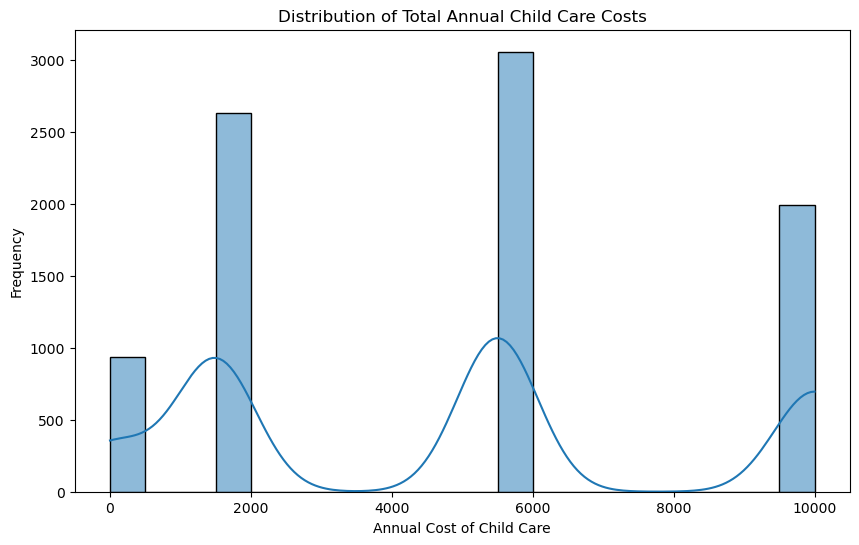

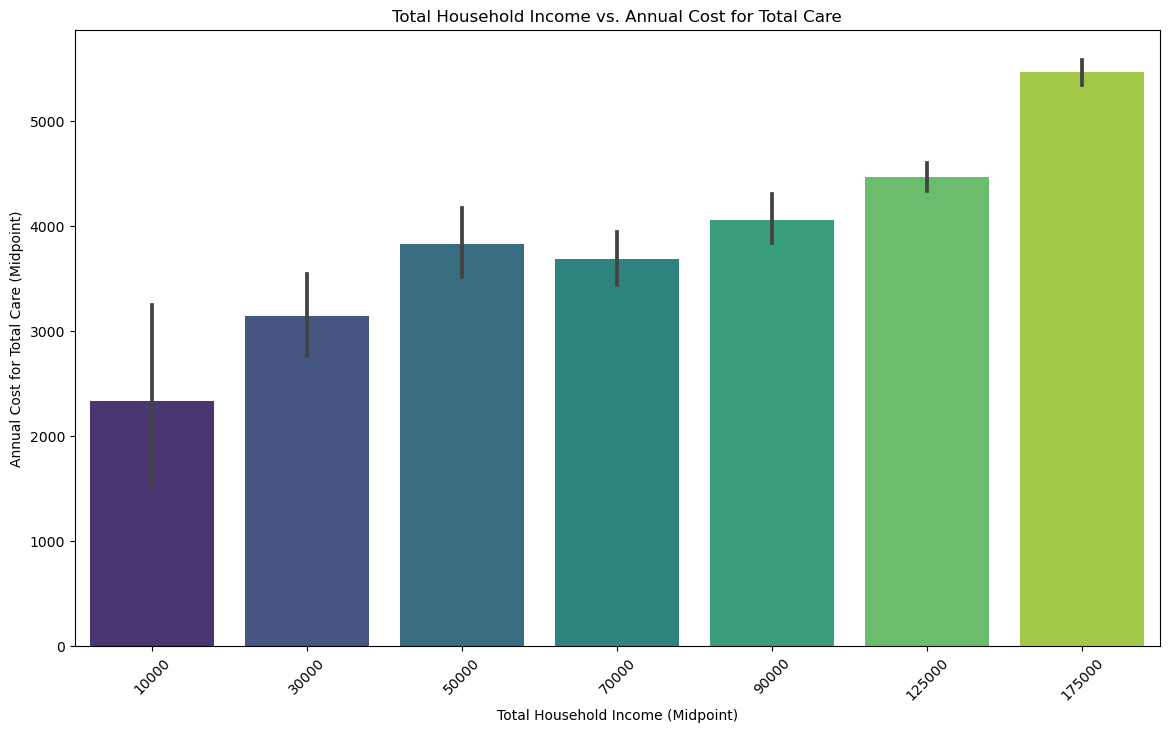

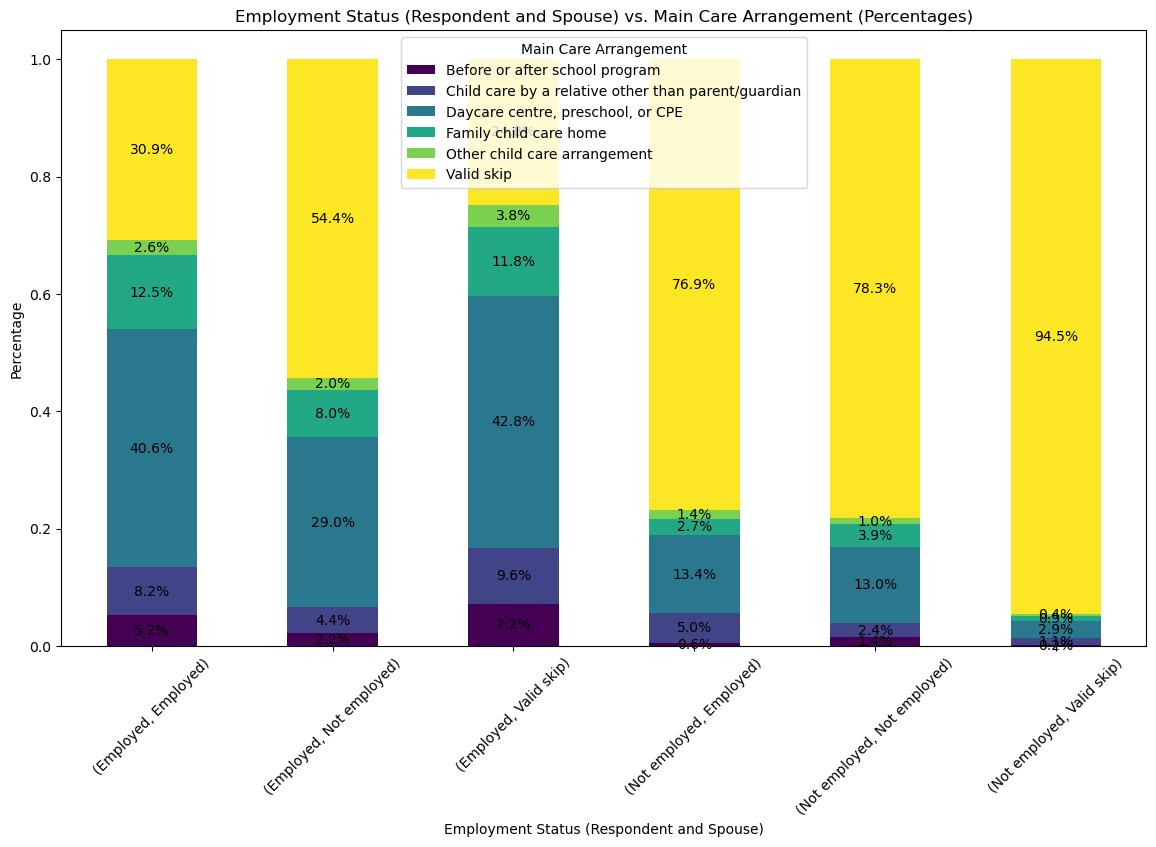

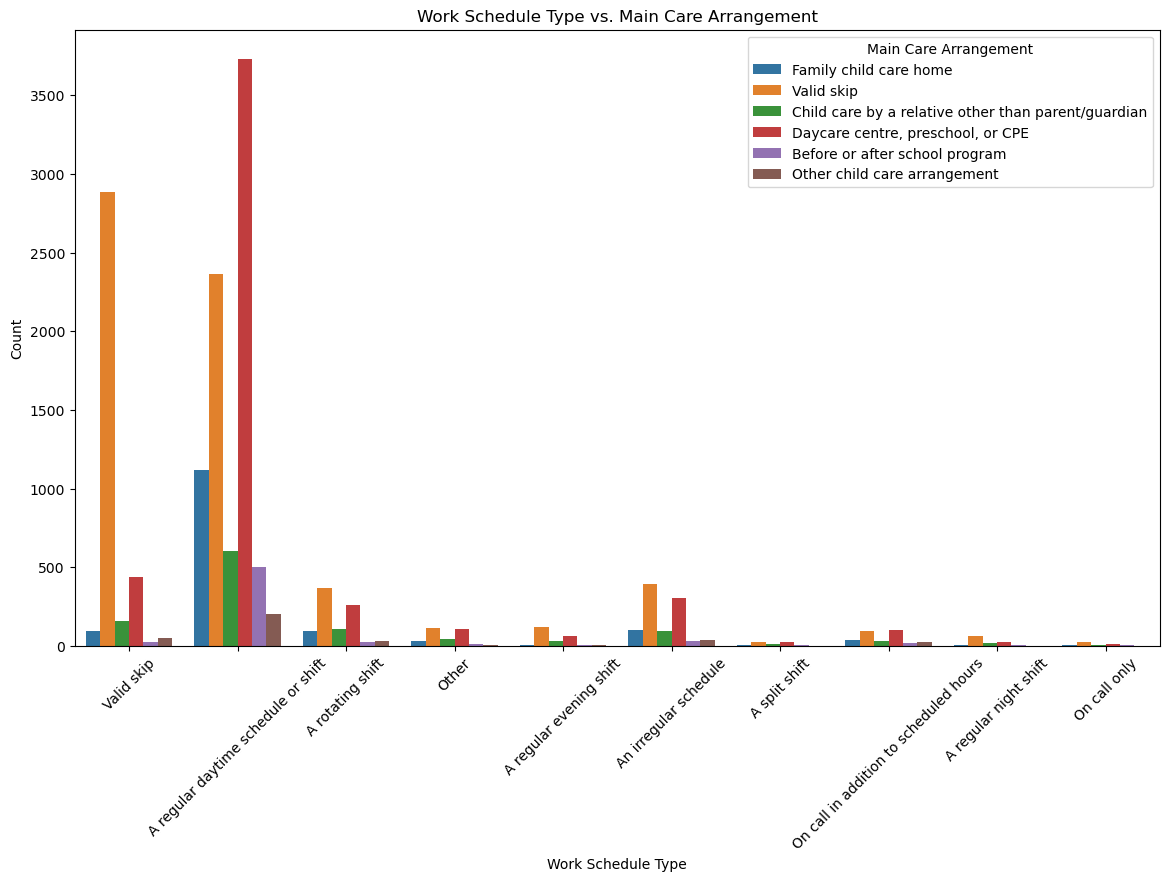

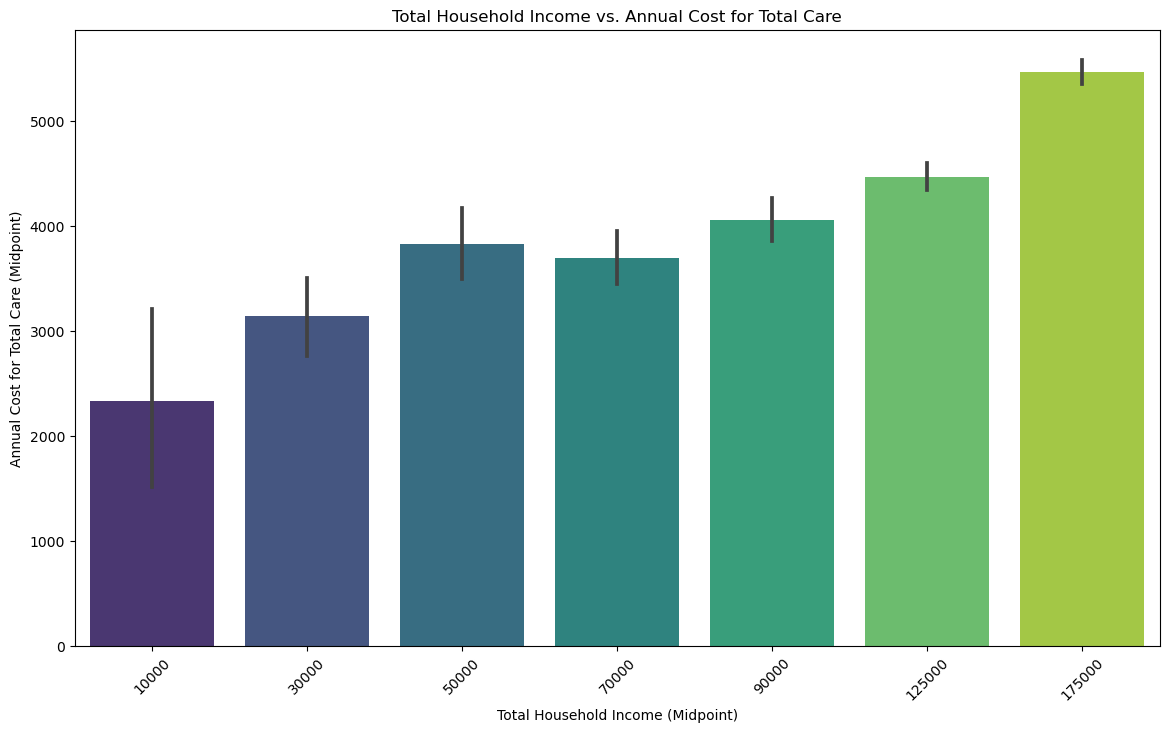

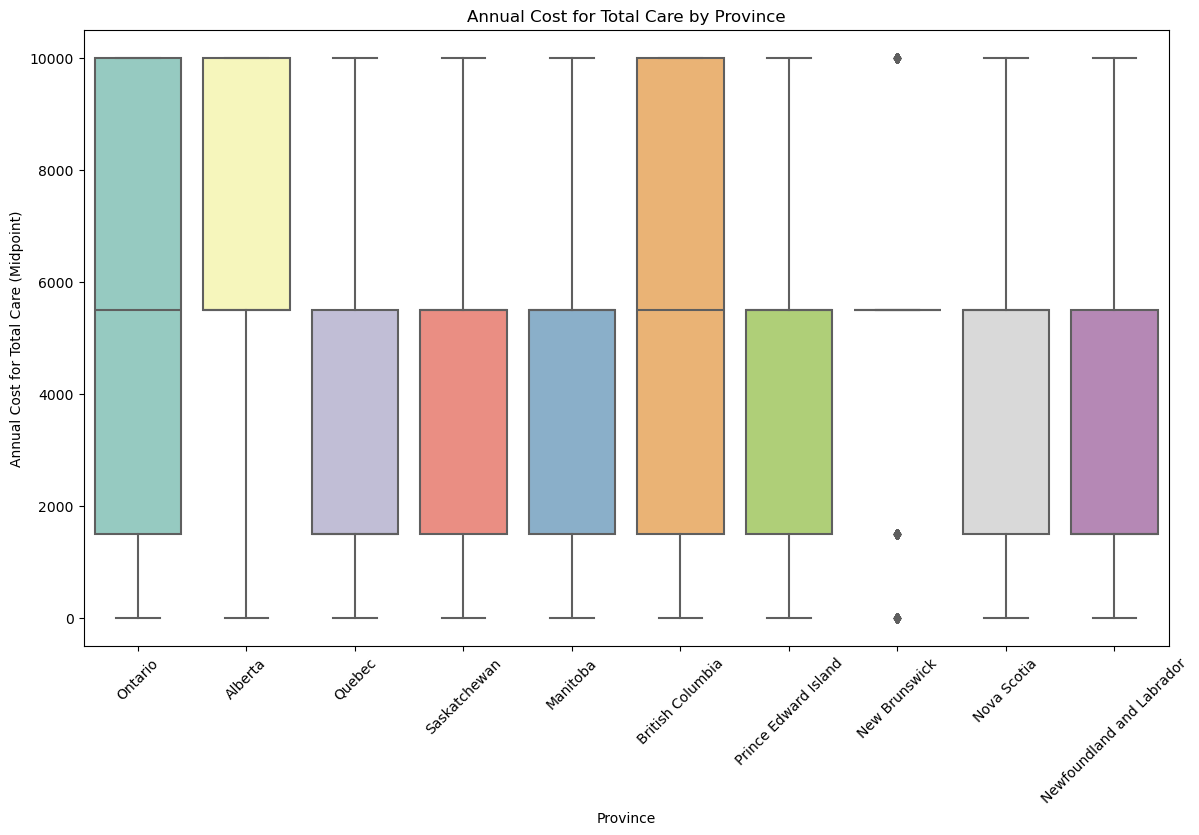

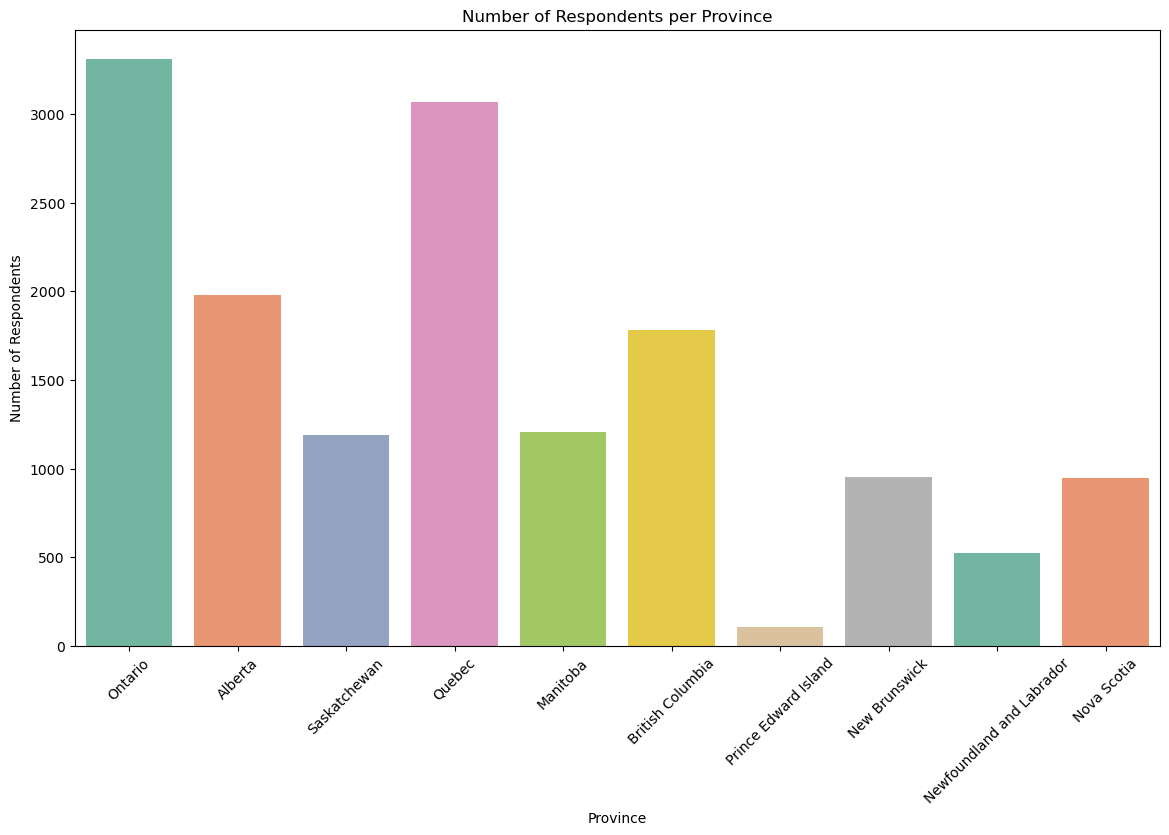

In [180]:
# Visualizations for Key Insights
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with NaN values in the numeric column to plot correctly
df_cleaned_numeric = df_cleaned.dropna(subset=['Annual_Cost_Care_Total'])

# Distribution of child care costs
# plt.figure(figsize=(12, 8))
# sns.barplot(data=df_cleaned_numeric, y='Annual_Cost_Care_Total', palette='viridis')
# plt.title('Distribution of Total Annual Child Care Costs')
# plt.ylabel('Annual Cost of Child Care')
# plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_numeric['Annual_Cost_Care_Total'], bins=20, kde=True)
plt.title('Distribution of Total Annual Child Care Costs')
plt.xlabel('Annual Cost of Child Care')
plt.ylabel('Frequency')
plt.show()

# plt.figure(figsize=(10, 6))
# sns.histplot(df_cleaned['Annual_Cost_Care_Total'], bins=20, kde=True)
# plt.title('Distribution of Total Annual Child Care Costs')
# plt.xlabel('Annual Cost of Child Care')
# plt.ylabel('Frequency')
# plt.show()
# Box plot for Annual Cost for Total Care

# Bar plot for Annual Cost for Total Care by Total Household Income
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned_numeric, x='Total_Household_Income_Grouped', y='Annual_Cost_Care_Total', palette='viridis')
plt.title('Total Household Income vs. Annual Cost for Total Care')
plt.xlabel('Total Household Income (Midpoint)')
plt.ylabel('Annual Cost for Total Care (Midpoint)')
plt.xticks(rotation=45)
plt.show()

# Count plot for employment status and main care arrangement
# Visualization of the cross-tabulation
# cross_tab_employment_care.plot(kind='bar', stacked=True, figsize=(14, 8))
# plt.title('Employment Status (Respondent and Spouse) vs. Main Care Arrangement')
# plt.xlabel('Employment Status (Respondent and Spouse)')
# plt.ylabel('Count')
# plt.legend(title='Main Care Arrangement')
# plt.xticks(rotation=45)
# plt.show()

# cross_tab_employment_care.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# plt.title('Employment Status (Respondent and Spouse) vs. Main Care Arrangement (Percentages)')
# plt.xlabel('Employment Status (Respondent and Spouse)')
# plt.ylabel('Percentage')
# plt.legend(title='Main Care Arrangement')
# plt.xticks(rotation=45)
# plt.show()
# Plot with percentages on bars
ax = cross_tab_employment_care.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Employment Status (Respondent and Spouse) vs. Main Care Arrangement (Percentages)')
plt.xlabel('Employment Status (Respondent and Spouse)')
plt.ylabel('Percentage')
plt.legend(title='Main Care Arrangement')
plt.xticks(rotation=45)

# Adding percentages on the plot
for c in ax.containers:
    labels = [f'{v:.1%}' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

# Count plot for work schedule type and main care arrangement
plt.figure(figsize=(14, 8))
sns.countplot(x='Work_Schedule_Type_Respondent', hue='Main_Care_Arrangement', data=df_cleaned)
plt.title('Work Schedule Type vs. Main Care Arrangement')
plt.xlabel('Work Schedule Type')
plt.ylabel('Count')
plt.legend(title='Main Care Arrangement')
plt.xticks(rotation=45)
plt.show()


# income vs cost
# Bar plot for Total Household Income vs. Annual Cost for Total Care
# plt.figure(figsize=(14, 8))
# sns.barplot(data=df_cleaned_numeric, x='Total_Household_Income_Grouped', y='Annual_Cost_Care_Total', palette='viridis')
# plt.title('Total Household Income vs. Annual Cost for Total Care')
# plt.xlabel('Total Household Income (Midpoint)')
# plt.ylabel('Annual Cost for Total Care (Midpoint)')
# plt.xticks(rotation=45)
# plt.show()

# Bar plot for Annual Cost for Total Care by Total Household Income
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned_numeric, x='Total_Household_Income_Grouped', y='Annual_Cost_Care_Total', palette='viridis')
plt.title('Total Household Income vs. Annual Cost for Total Care')
plt.xlabel('Total Household Income (Midpoint)')
plt.ylabel('Annual Cost for Total Care (Midpoint)')
plt.xticks(rotation=45)
plt.show()

# Box plot for Annual Cost for Total Care by Province
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned_numeric, x='Province', y='Annual_Cost_Care_Total', palette='Set3')
plt.title('Annual Cost for Total Care by Province')
plt.xlabel('Province')
plt.ylabel('Annual Cost for Total Care (Midpoint)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for the number of respondents in each province
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, x='Province', palette='Set2')
plt.title('Number of Respondents per Province')
plt.xlabel('Province')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

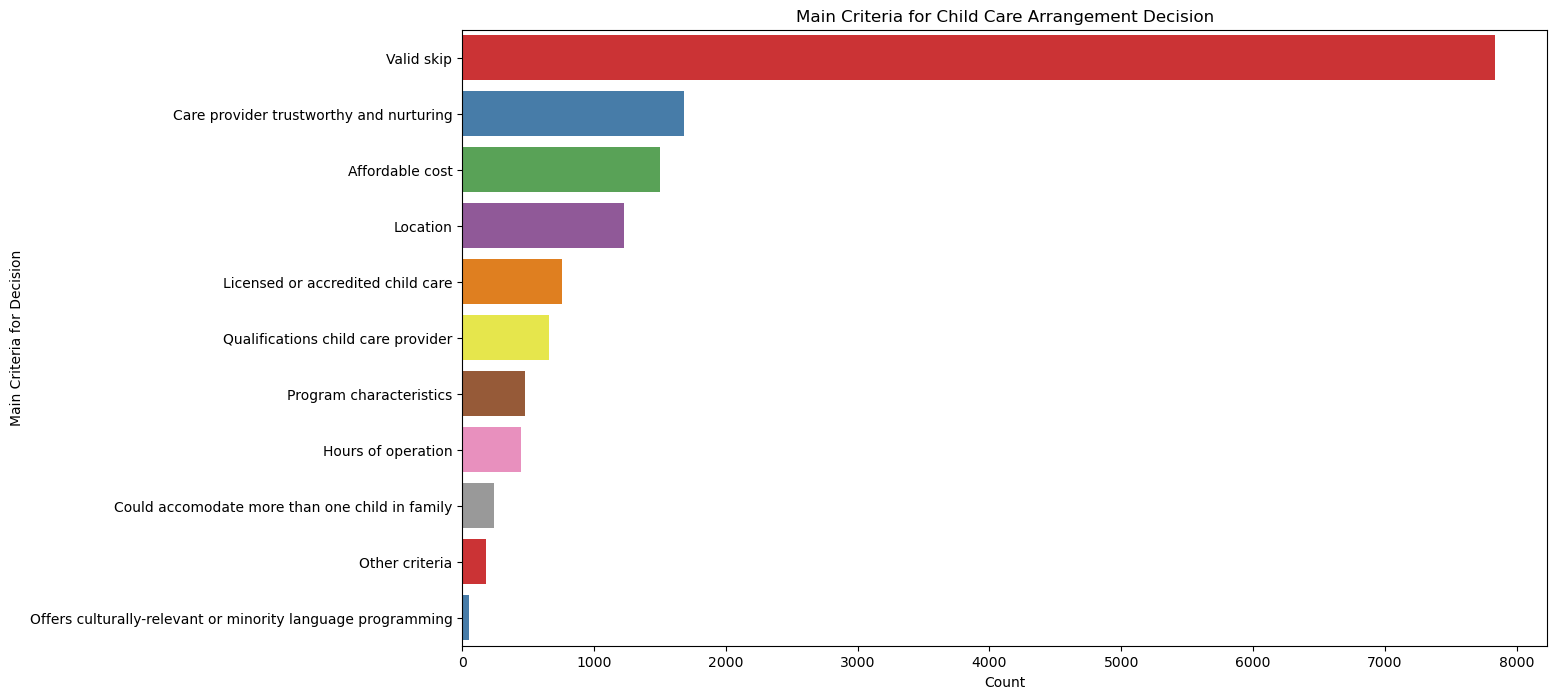

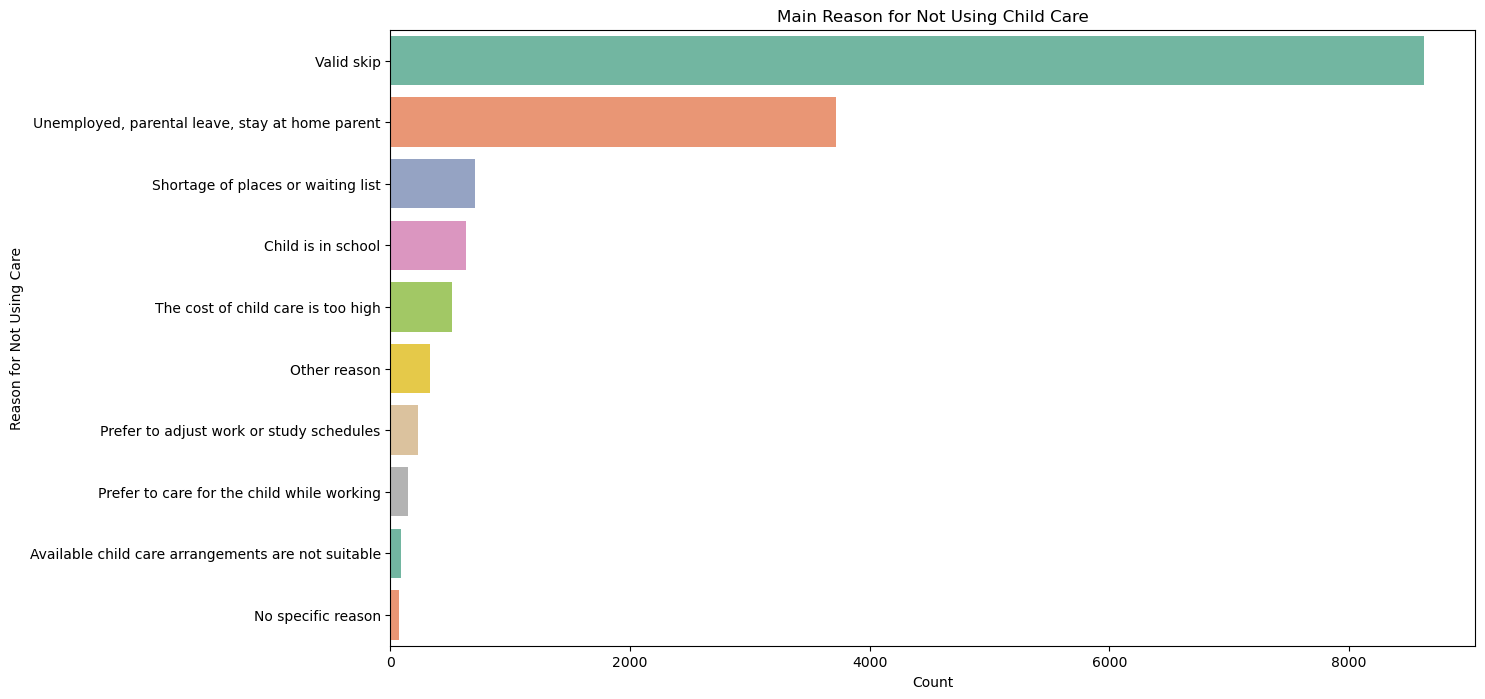

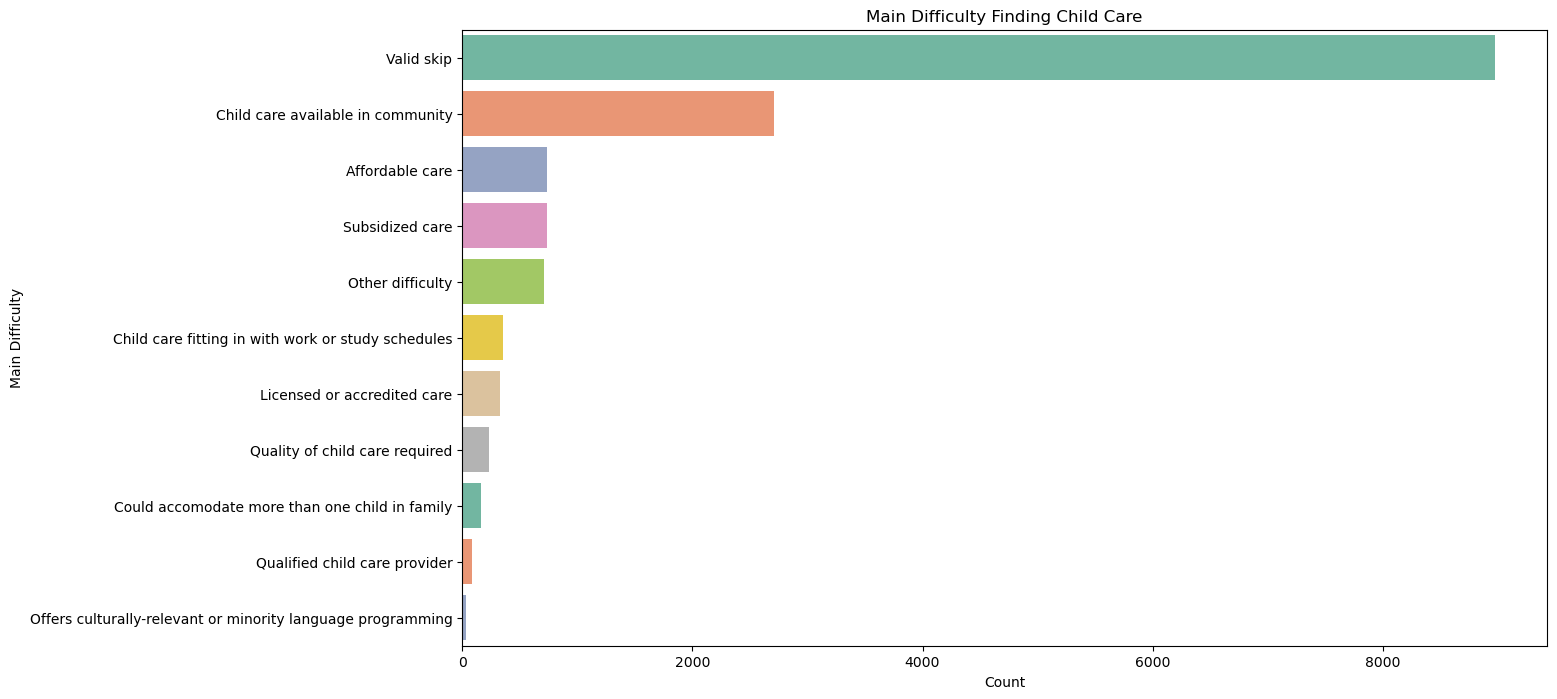

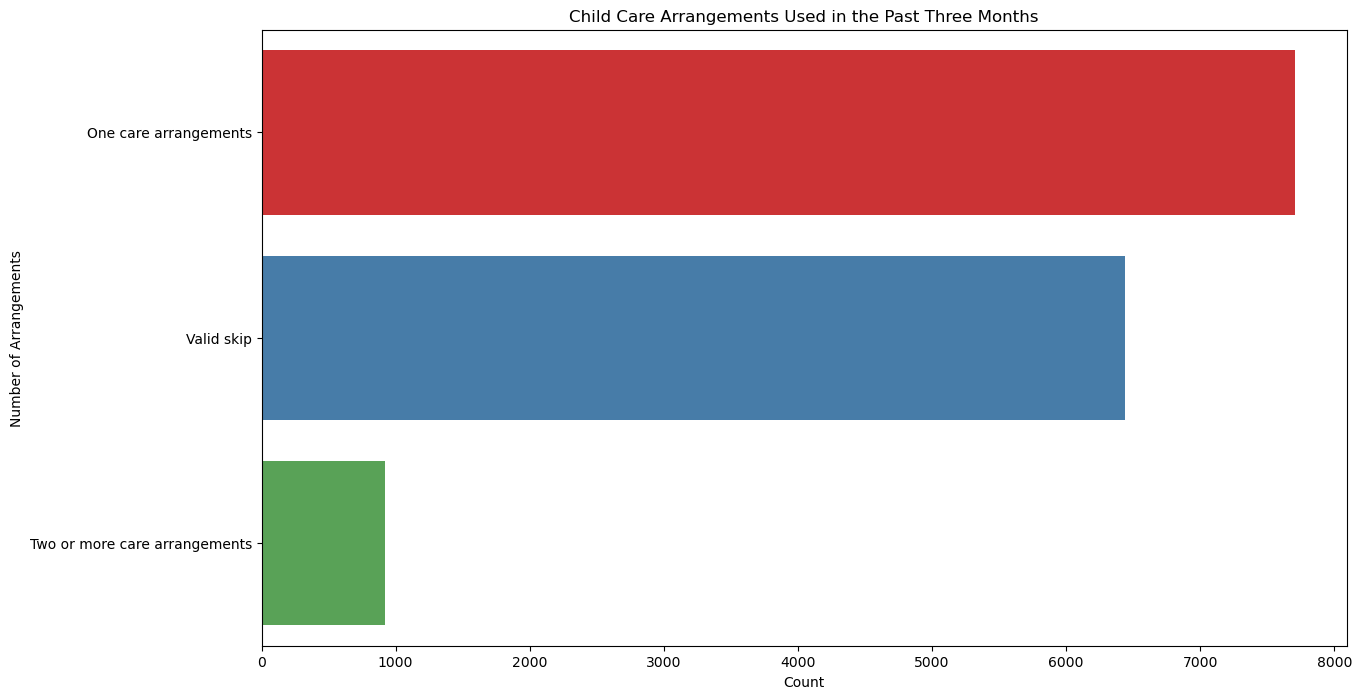

In [182]:
# Bar plot for Main Criteria for Child Care Arrangement Decision
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Most_Important_Criteria_Decision_Child_Care_Arrangement', palette='Set1', order=df_cleaned['Most_Important_Criteria_Decision_Child_Care_Arrangement'].value_counts().index)
plt.title('Main Criteria for Child Care Arrangement Decision')
plt.xlabel('Count')
plt.ylabel('Main Criteria for Decision')
plt.show()

# Count plot for Main Reason for Not Using Child Care
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Main_Reason_Not_Using_Care', palette='Set2', order=df_cleaned['Main_Reason_Not_Using_Care'].value_counts().index)
plt.title('Main Reason for Not Using Child Care')
plt.xlabel('Count')
plt.ylabel('Reason for Not Using Care')
plt.show()

# Count plot for Main Difficulty Finding Child Care
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Main_Difficulty_Finding_Care', palette='Set2', order=df_cleaned['Main_Difficulty_Finding_Care'].value_counts().index)
plt.title('Main Difficulty Finding Child Care')
plt.xlabel('Count')
plt.ylabel('Main Difficulty')
plt.show()

# Count plot for Child Care Arrangements Used in the Past Three Months
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Num_Care_Arrangements', palette='Set1', order=df_cleaned['Num_Care_Arrangements'].value_counts().index)
plt.title('Child Care Arrangements Used in the Past Three Months')
plt.xlabel('Count')
plt.ylabel('Number of Arrangements')
plt.show()

# Figure out not applicable, i.e. valid skip values since those would be happening if for example this column doesn't apply based on another column

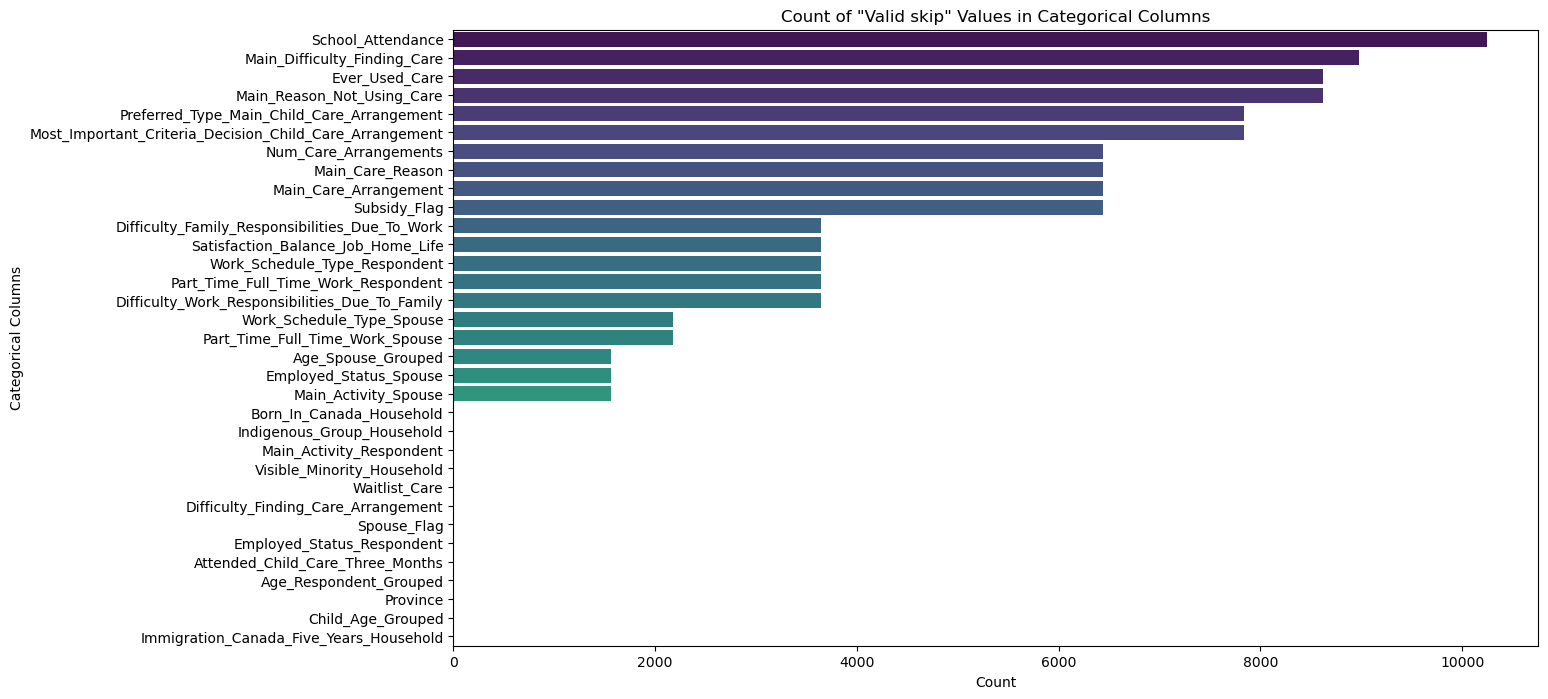

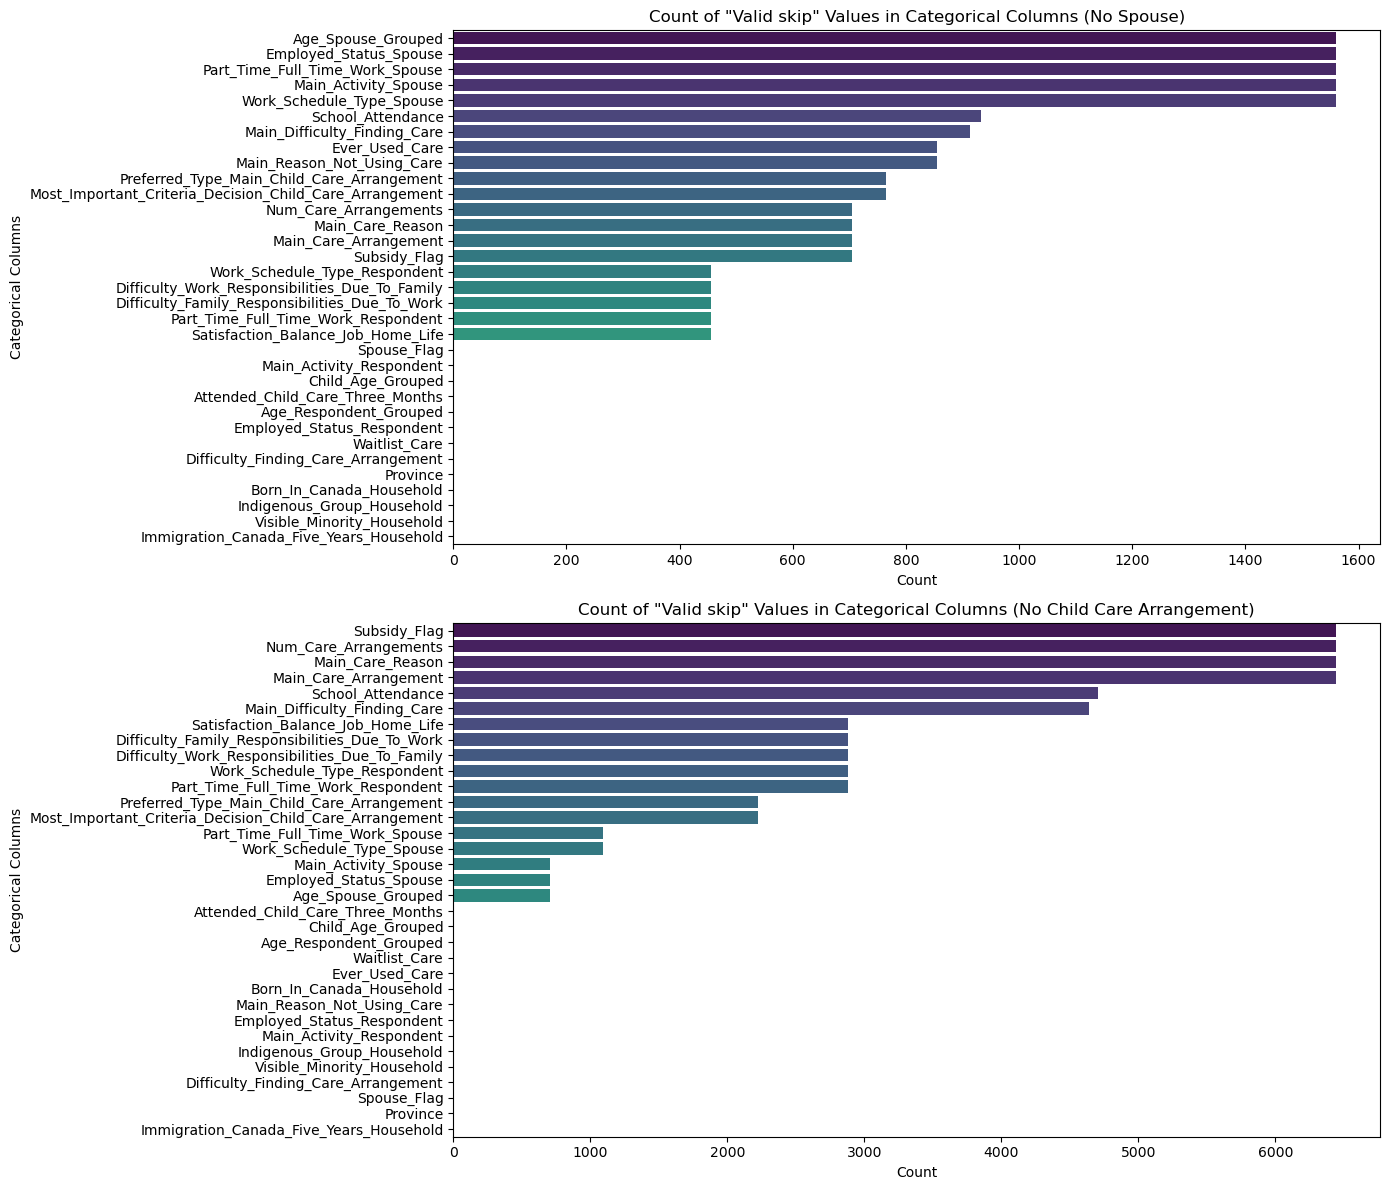

In [184]:
# Plotting "Valid skip" values
plt.figure(figsize=(14, 8))
valid_skip_counts = df_cleaned[categorical_columns].apply(lambda x: (x == 'Valid skip').sum()).sort_values(ascending=False)
sns.barplot(x=valid_skip_counts.values, y=valid_skip_counts.index, palette='viridis')
plt.title('Count of "Valid skip" Values in Categorical Columns')
plt.xlabel('Count')
plt.ylabel('Categorical Columns')
plt.show()

# Compare "Valid skip" with "no spouse" and "no child care arrangement"
# Assuming 'Spouse_Flag' indicates the presence of a spouse and 'Attended_Child_Care_Three_Months' indicates child care arrangement
no_spouse = df_cleaned['Spouse_Flag'] == "Respondent did not report a spouse in household"
no_child_care = df_cleaned['Attended_Child_Care_Three_Months'] == 'No'

# Plotting comparison
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
valid_skip_counts_spouse = df_cleaned[no_spouse][categorical_columns].apply(lambda x: (x == 'Valid skip').sum()).sort_values(ascending=False)
sns.barplot(x=valid_skip_counts_spouse.values, y=valid_skip_counts_spouse.index, palette='viridis', ax=axes[0])
axes[0].set_title('Count of "Valid skip" Values in Categorical Columns (No Spouse)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Categorical Columns')

valid_skip_counts_child_care = df_cleaned[no_child_care][categorical_columns].apply(lambda x: (x == 'Valid skip').sum()).sort_values(ascending=False)
sns.barplot(x=valid_skip_counts_child_care.values, y=valid_skip_counts_child_care.index, palette='viridis', ax=axes[1])
axes[1].set_title('Count of "Valid skip" Values in Categorical Columns (No Child Care Arrangement)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Categorical Columns')

plt.tight_layout()
plt.show()


Correlation of Valid Values in One Column vs. NaN in Other Columns:
                                 Annual_Cost_Relative_Care  \
Annual_Cost_Daycare                               0.904615   
Annual_Cost_Relative_Care                              NaN   
Annual_Cost_Family_Care                           0.905405   
Annual_Cost_Before_After_School                   0.917160   
Annual_Cost_Other_Care                            0.788066   
Annual_Cost_Care_Total                            0.804151   

                                 Annual_Cost_Family_Care  \
Annual_Cost_Daycare                             0.986538   
Annual_Cost_Relative_Care                       0.912966   
Annual_Cost_Family_Care                              NaN   
Annual_Cost_Before_After_School                 0.989645   
Annual_Cost_Other_Care                          0.954733   
Annual_Cost_Care_Total                          0.819805   

                                 Annual_Cost_Before_After_School  \
Annual_C

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


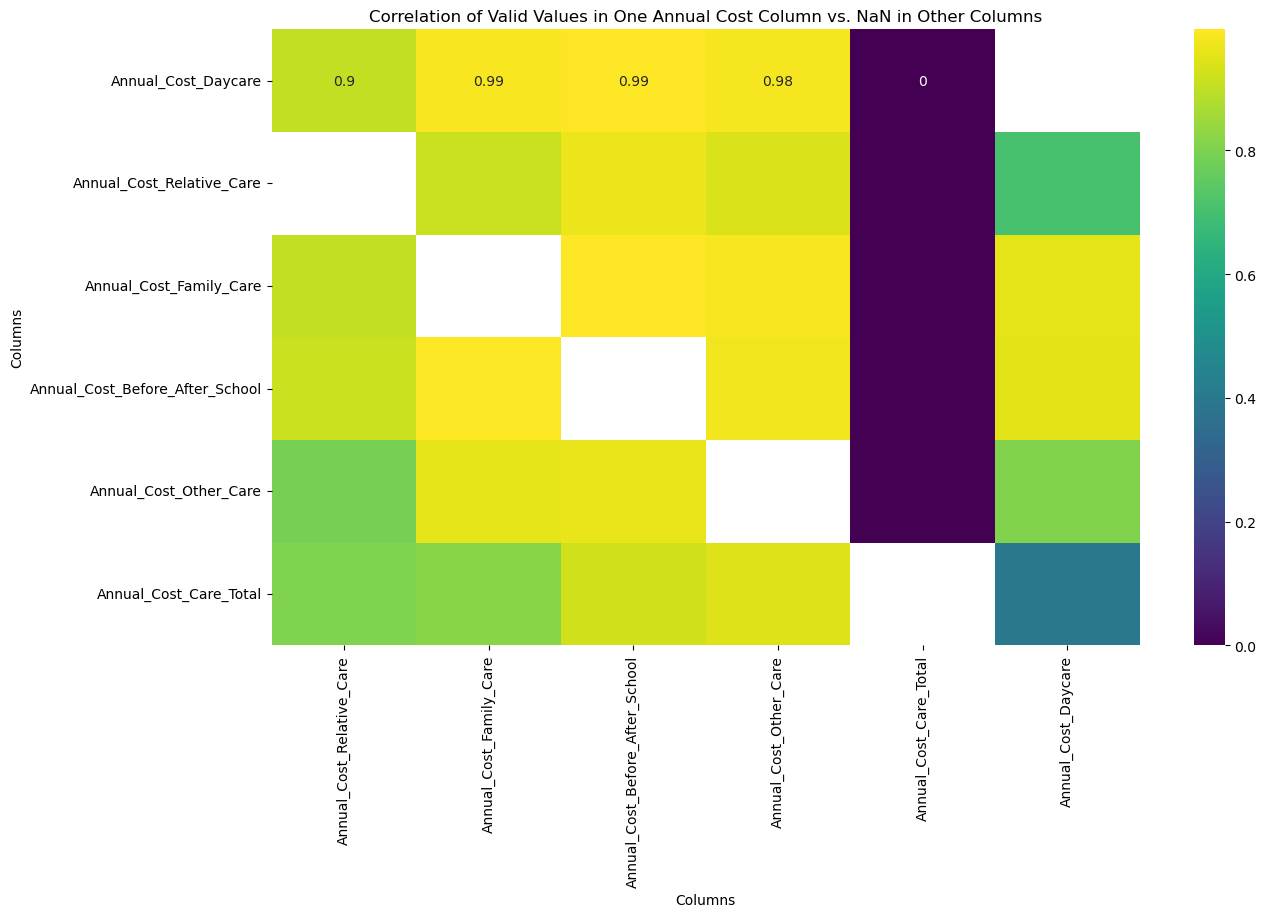

In [186]:
# analyze if the presence of valid values (i.e., non-NaN or non-Valid skip) in one annual cost column correlates with the presence of NaN or Valid skip values in other annual cost columns
#  We can achieve this by calculating the number of rows where one column has valid values and checking the distribution of NaN or Valid skip values in the other columns

# Define a function to analyze correlation of NaN values
def analyze_valid_vs_nan(df, columns):
    correlation_dict = {}
    for col in columns:
        correlation_dict[col] = {}
        valid_rows = df[~df[col].isna()]
        for other_col in columns:
            if col != other_col:
                nan_count = valid_rows[other_col].isna().sum()
                total_valid = valid_rows.shape[0]
                correlation_dict[col][other_col] = nan_count / total_valid if total_valid > 0 else np.nan
    return correlation_dict

# Analyze correlation
correlation_results = analyze_valid_vs_nan(df_cleaned, annual_cost_columns)

# Convert the results to a DataFrame for better readability
correlation_df = pd.DataFrame(correlation_results).T

# Display the correlation DataFrame
print("Correlation of Valid Values in One Column vs. NaN in Other Columns:")
print(correlation_df)

# Plotting the correlation results
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_df, annot=True, cmap="viridis", cbar=True)
plt.title('Correlation of Valid Values in One Annual Cost Column vs. NaN in Other Columns')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()

In [62]:
# Exclusive Usage: High correlation values (close to 1) between one cost column having valid values and other columns having NaN values suggest that
# families tend to use one type of child care arrangement exclusively. For example, if they use daycare, they are unlikely to report costs for relative care, family care, or other types.

In [64]:
# TODO: use predictive model and on HPC

# analysis in parallel